Reading and pre-processing of time-series data for 4 stations

In [ ]:
                                                                                                                                                                                                                                                                        from math import sqrt
import numpy as np
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from pandas import read_csv
from datetime import datetime
from keras.layers import Bidirectional
from keras.layers import Dropout
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import seaborn as sn
import copy
## Animesh's Update

# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')

# Anand Vihar
dfav = read_csv('/content/sample_data/Anand_Vihar_with_Humidity.csv')
dfav.columns = ['From Date','PM10','NO','NO2','WS','CO','Benzene','NOx','Ozone','SO2','NH3','Toluene','PM2.5', 'Humidity']

# Bawana
# dfbw= read_csv('/content/sample_data/Bawana_with_Humidity.csv')
# dfbw.columns = ['From Date','PM10','NO','NO2','WS','CO','Benzene','NOx','Ozone','SO2','NH3','Toluene','PM2.5', 'Humidity']

# Vivek Vihar
# dfvv = read_csv('/content/sample_data/Vivek_Vihar_with_Humidity.csv')
# dfvv.columns = ['From Date','PM10','NO','NO2','WS','CO','Benzene','NOx','Ozone','SO2','NH3','Toluene','PM2.5', 'Humidity']


# dfwz = read_csv('data_new/Wazirpur_8h_jan19-dec20.csv')
# dfwz.columns = ['From Date','PM10','NO','NO2','WS','CO','Benzene','NOx','Ozone','SO2','NH3','Toluene','PM2.5', 'Humidity']


# DTU
# dfdt = read_csv('/content/sample_data/DTU_with_Humidity.csv')
# dfdt.columns = ['From Date','PM10','NO','NO2','WS','CO','Benzene','NOx','Ozone','SO2','NH3','Toluene','PM2.5', 'Humidity']



# Edit it accordingly for 4 different stations: Currently set-up for Anand Vihar
df= dfav

print("Shape of df:",df.shape)


print(df.head(5))


cols = ['PM10', 'NO', 'NO2', 'WS', 'CO', 'Benzene', 'NOx', 'Ozone',
        'SO2', 'NH3', 'Toluene', 'PM2.5']

df.fillna({col: df[col].median() for col in cols}, inplace=True)

print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())


Shape of df: (2128, 14)
             From Date    PM10      NO     NO2    WS    CO  Benzene     NOx  \
0  2019-01-01 00:00:00  752.78  179.68  111.66  0.30  3.52    20.45  251.70   
1  2019-01-01 08:00:00  408.19  135.13  148.64  0.53  4.57     9.75  189.21   
2  2019-01-01 16:00:00  475.85  123.27  177.02  0.31  5.66    17.79  176.38   
3  2019-01-02 00:00:00  771.27  357.61  106.05  0.30  5.96    20.90  350.56   
4  2019-01-02 08:00:00  495.06   75.60  125.28  1.13  1.56    10.11  128.26   

   Ozone    SO2     NH3  Toluene   PM2.5  Humidity  
0  22.86  10.79   93.35    58.33  492.03   77.2425  
1  22.68  13.86  104.40    31.63  266.16   77.2425  
2  26.04  21.74   89.24    89.25  382.50   77.2425  
3  61.84   5.99  109.64    99.34  545.28   87.6378  
4  34.37  19.54  108.53    57.46  344.22   87.6378  
 
Count total NaN at each column in a DataFrame : 

 From Date    0
PM10         0
NO           0
NO2          0
WS           0
CO           0
Benzene      0
NOx          0
Ozone     

In [ ]:
df.head()

,From Date,PM10,NO,NO2,WS,CO,Benzene,NOx,Ozone,SO2,NH3,Toluene,PM2.5,Humidity
0,2019-01-01 00:00:00,752.78,179.68,111.66,0.30,3.52,20.45,251.70,22.86,10.79,93.35,58.33,492.03,77.2425
1,2019-01-01 08:00:00,408.19,135.13,148.64,0.53,4.57,9.75,189.21,22.68,13.86,104.40,31.63,266.16,77.2425
2,2019-01-01 16:00:00,475.85,123.27,177.02,0.31,5.66,17.79,176.38,26.04,21.74,89.24,89.25,382.50,77.2425
3,2019-01-02 00:00:00,771.27,357.61,106.05,0.30,5.96,20.90,350.56,61.84,5.99,109.64,99.34,545.28,87.6378
4,2019-01-02 08:00:00,495.06,75.60,125.28,1.13,1.56,10.11,128.26,34.37,19.54,108.53,57.46,344.22,87.6378


In [ ]:
features = df.loc[:, df.columns != 'From Date']
features = features.astype(float)
features.head()

,PM10,NO,NO2,WS,CO,Benzene,NOx,Ozone,SO2,NH3,Toluene,PM2.5,Humidity
0,752.78,179.68,111.66,0.30,3.52,20.45,251.70,22.86,10.79,93.35,58.33,492.03,77.2425
1,408.19,135.13,148.64,0.53,4.57,9.75,189.21,22.68,13.86,104.40,31.63,266.16,77.2425
2,475.85,123.27,177.02,0.31,5.66,17.79,176.38,26.04,21.74,89.24,89.25,382.50,77.2425
3,771.27,357.61,106.05,0.30,5.96,20.90,350.56,61.84,5.99,109.64,99.34,545.28,87.6378
4,495.06,75.60,125.28,1.13,1.56,10.11,128.26,34.37,19.54,108.53,57.46,344.22,87.6378


In [ ]:
# Table for range, mean and std for different features
feat = features['PM10'].values
print("PM10 :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['NO'].values
print("NO :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['NO2'].values
print("NO2 :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['WS'].values
print("WS :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['CO'].values
print("CO :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['Benzene'].values
print("Benzene :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['NOx'].values
print("NOx :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['Ozone'].values
print("Ozone :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['SO2'].values
print("SO2 :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['NH3'].values
print("NH3 :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['Toluene'].values
print("Toluene :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
feat = features['PM2.5'].values
print("PM2.5 :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))
# feat = features['Humidity'].values
# print("Humidity :", "Min = ",min(feat), ", Max = ", max(feat) , ", Mean = ", np.mean(feat), ", Std = ",np.std(feat))


PM10 : Min =  14.19 , Max =  939.3 , Mean =  238.9531672932331 , Std =  158.7151124412036
NO : Min =  0.3 , Max =  490.9 , Mean =  80.59628289473683 , Std =  78.37593403856881
NO2 : Min =  0.43 , Max =  360.51 , Mean =  74.19296052631579 , Std =  41.03640331881324
WS : Min =  0.3 , Max =  4.43 , Mean =  0.8629652255639098 , Std =  0.6816515731748818
CO : Min =  0.01 , Max =  7.21 , Mean =  2.135610902255639 , Std =  1.1021416706289533
Benzene : Min =  0.0 , Max =  30.82 , Mean =  3.860859962406015 , Std =  3.40661718730482
NOx : Min =  0.13 , Max =  472.48 , Mean =  107.18660714285713 , Std =  80.07864466359113
Ozone : Min =  1.42 , Max =  180.38 , Mean =  36.150296052631575 , Std =  26.33671023268468
SO2 : Min =  0.5 , Max =  94.36 , Mean =  13.567551691729323 , Std =  9.504119005743535
NH3 : Min =  0.1 , Max =  136.3 , Mean =  44.778796992481205 , Std =  23.78438681104865
Toluene : Min =  0.0 , Max =  450.98 , Mean =  32.05791353383458 , Std =  40.86692184975187
PM2.5 : Min =  6.93 ,

Correlation Matrix and Heatmap for features

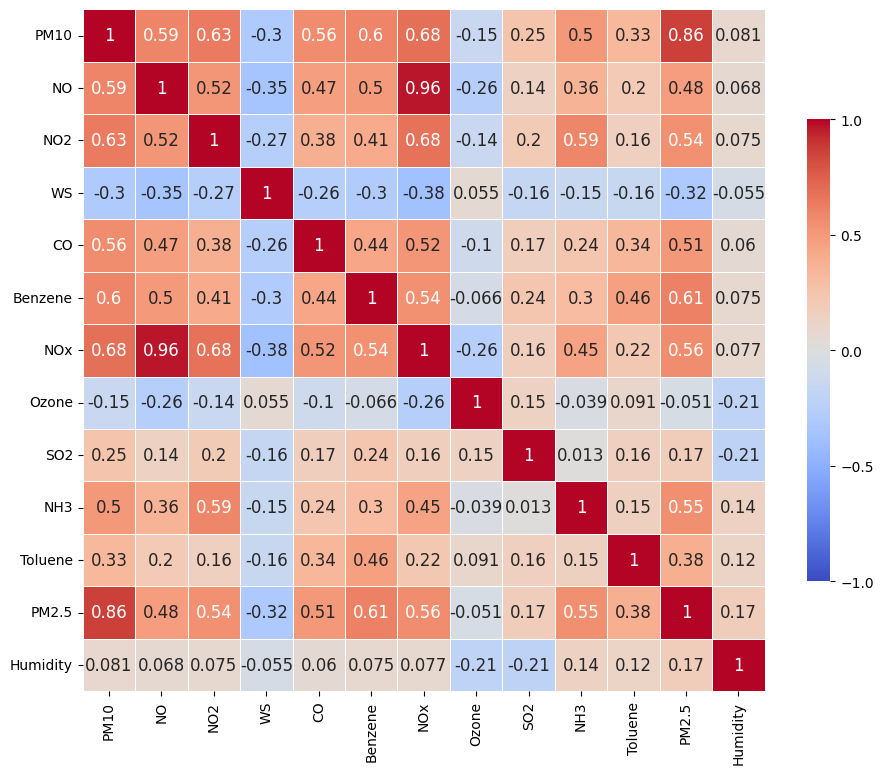

In [ ]:

corr_matrix = features.corr()
f, ax = plt.subplots(figsize=(11, 15))
heatmap = sn.heatmap(corr_matrix,
                      #mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sn.set_style({'xtick.bottom': True}, {'ytick.left': True})

Preparation of dataframe for analysis

In [ ]:
df['Date'] = pd.to_datetime(df['From Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df['minute'] = df['Date'].dt.minute


In [ ]:
df.head()

,From Date,PM10,NO,NO2,WS,CO,Benzene,NOx,Ozone,SO2,NH3,Toluene,PM2.5,Humidity,Date,year,month,day,hour,minute
0,2019-01-01 00:00:00,752.78,179.68,111.66,0.30,3.52,20.45,251.70,22.86,10.79,93.35,58.33,492.03,77.2425,2019-01-01 00:00:00,2019,1,1,0,0
1,2019-01-01 08:00:00,408.19,135.13,148.64,0.53,4.57,9.75,189.21,22.68,13.86,104.40,31.63,266.16,77.2425,2019-01-01 08:00:00,2019,1,1,8,0
2,2019-01-01 16:00:00,475.85,123.27,177.02,0.31,5.66,17.79,176.38,26.04,21.74,89.24,89.25,382.50,77.2425,2019-01-01 16:00:00,2019,1,1,16,0
3,2019-01-02 00:00:00,771.27,357.61,106.05,0.30,5.96,20.90,350.56,61.84,5.99,109.64,99.34,545.28,87.6378,2019-01-02 00:00:00,2019,1,2,0,0
4,2019-01-02 08:00:00,495.06,75.60,125.28,1.13,1.56,10.11,128.26,34.37,19.54,108.53,57.46,344.22,87.6378,2019-01-02 08:00:00,2019,1,2,8,0


Splitting into train/test for different LSTM models depending on months covering pre-lockdown and during/post-lockdown respectively.

In [ ]:
df_train = df[(df["year"] <2020) | (df['month']<=5)]
df_test=df[(df["year"] >2019) & (df['month']<=12) & (df['month']>5)]
df.to_csv('pollution.csv')
df_train.to_csv('train_pollution.csv')
df_test.to_csv('test_pollution.csv')

For season-wise training and testing. Uncomment this for corresponding seasonal analysis.

In [ ]:
## For season-wise training and testing
"""
df_train = df[((df["year"] == 2019) ) & (df['month'] >= 2) & (df['month'] <=9)]
df_test=df[(df["year"]==2020) & (df['month'] >= 2) & (df['month'] <=9)]
df.to_csv('pollution.csv')
df_train.to_csv('train_pollution.csv')
df_test.to_csv('test_pollution.csv')"""

'\ndf_train = df[((df["year"] == 2019) ) & (df[\'month\'] >= 2) & (df[\'month\'] <=9)]\ndf_test=df[(df["year"]==2020) & (df[\'month\'] >= 2) & (df[\'month\'] <=9)]\ndf.to_csv(\'pollution.csv\')\ndf_train.to_csv(\'train_pollution.csv\')\ndf_test.to_csv(\'test_pollution.csv\')'

In [ ]:
# Note: df_july has to be used only for seasonal analysis
df_july = df[((df["year"] == 2020) ) & (df['month'] == 9)  ]
#df_july = df[((df["year"] == 2020) ) & (df['month'] >= 8) & (df['month'] <=9)]
df_july.to_csv('july_test.csv')

Plotting the time-series data for train

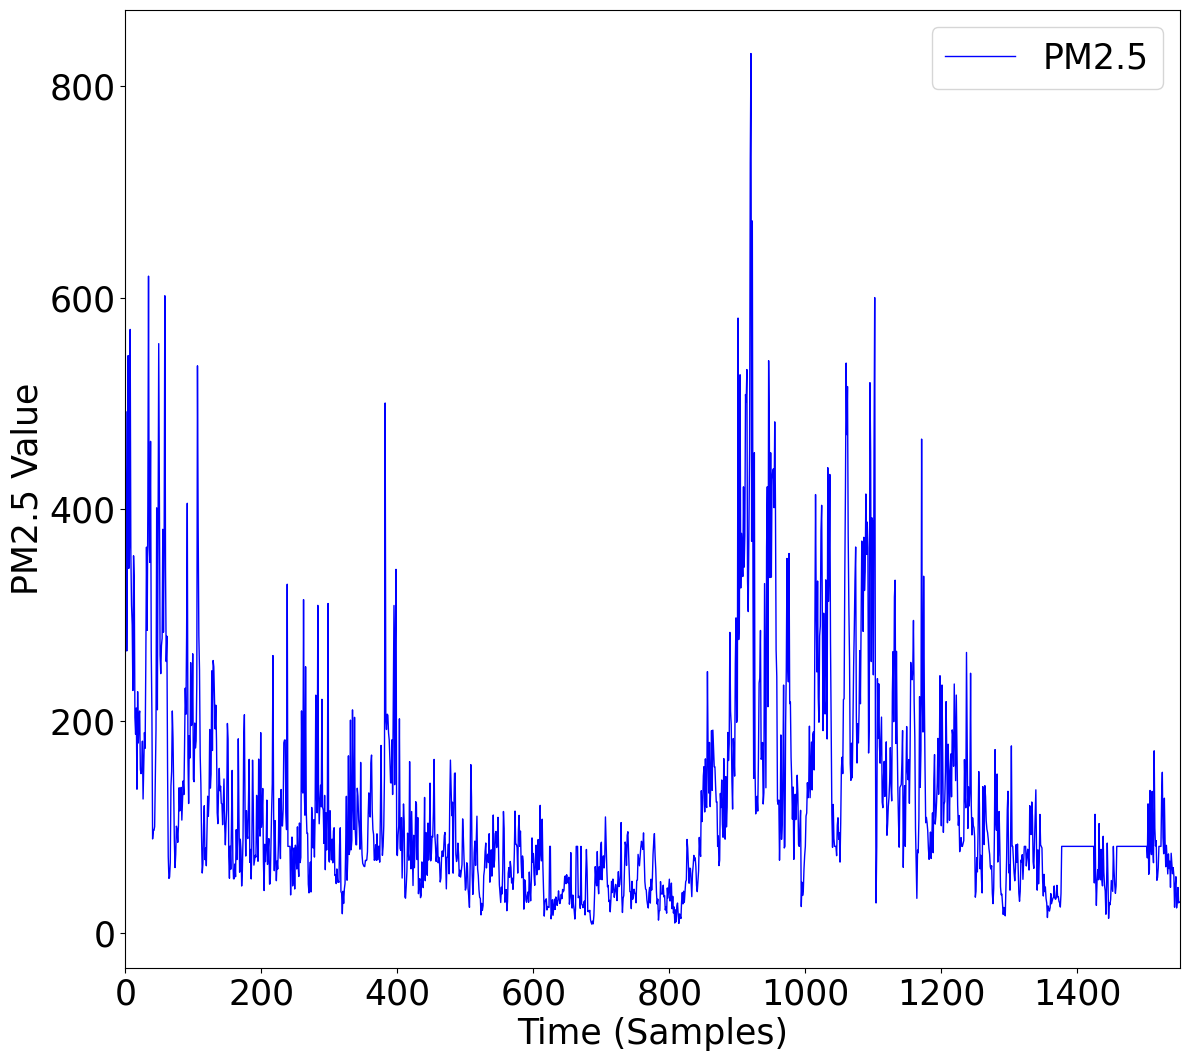

<Figure size 640x480 with 0 Axes>

In [ ]:
x_val = np.linspace(1,df_train.shape[0],num = df_train.shape[0])
plot_list = np.array(df_train['PM2.5'].values)
y_val = np.array([(float)(k) for k in plot_list])
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
plt.tick_params(labelsize=25)
params = {'legend.fontsize': 25, 'legend.handlelength': 2}
plt.rcParams.update(params)
surrogate_plot = ax.plot(x_val,y_val,linestyle='-', linewidth= 1, color= 'b', label= 'PM2.5')
ax.set_xlabel('Time (Samples)',size= 25)
ax.set_ylabel('PM2.5 Value', size= 25)
ax.set_xlim([0,np.amax(x_val)])
ax.legend(loc='best')
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
plt.clf()

Plotting the time-series data for test

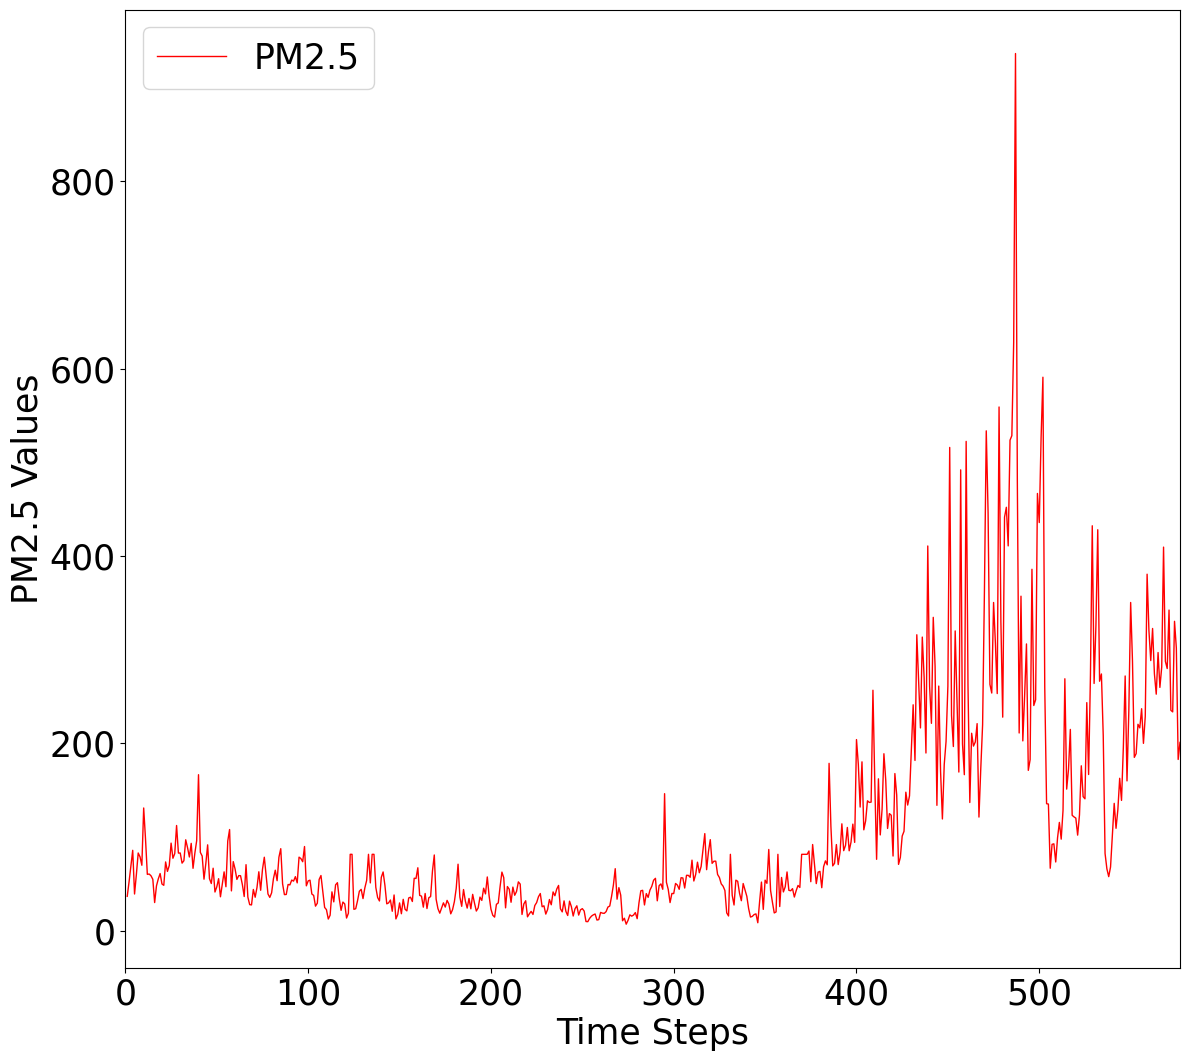

<Figure size 640x480 with 0 Axes>

In [ ]:
x_val = np.linspace(1,df_test.shape[0],num = df_test.shape[0])
plot_list = np.array(df_test['PM2.5'].values)
y_val = np.array([(float)(k) for k in plot_list])
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
plt.tick_params(labelsize=25)
params = {'legend.fontsize': 25, 'legend.handlelength': 2}
plt.rcParams.update(params)
surrogate_plot = ax.plot(x_val,y_val,linestyle='-', linewidth= 1, color= 'r', label= 'PM2.5')
ax.set_xlabel('Time Steps',size= 25)
ax.set_ylabel('PM2.5 Values', size= 25)
ax.set_xlim([0,np.amax(x_val)])
ax.legend(loc='best')
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()
plt.clf()

In [ ]:
dataset_train = read_csv('train_pollution.csv', header=0, index_col=0)
dataset_test = read_csv('test_pollution.csv', header=0, index_col=0)
values_train = dataset_train.values
values_test = dataset_test.values
values_train=values_train[:,1:-6]
values_test=values_test[:,1:-6]
print(values_train.shape,values_test.shape)
n_hours=1
n_out= 1
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
print(values.shape)
print(dataset_test.tail())


(1551, 13) (577, 13)
(2128, 20)
                From Date    PM10      NO     NO2    WS    CO  Benzene  \
2123  2020-12-08 16:00:00  426.88  263.38  117.48  0.30  4.29     7.38   
2124  2020-12-09 00:00:00  407.25  341.16   75.62  0.30  4.75     2.94   
2125  2020-12-09 08:00:00  353.31   56.12   87.80  0.31  2.48     8.67   
2126  2020-12-09 16:00:00  314.28  118.58   48.84  0.30  3.97     9.99   
2127  2020-12-10 00:00:00  261.00   23.75   27.40  0.30  1.90     7.25   

         NOx  Ozone    SO2    NH3  Toluene   PM2.5  Humidity  \
2123  288.26  16.23  37.45  58.13   152.52  233.56   58.1617   
2124  328.39  15.88  16.91  58.52   220.12  330.22   73.5545   
2125   92.40  26.99  23.87  36.83    61.83  301.69   73.5545   
2126  122.65  14.00  10.79  21.07    83.18  182.78   73.5545   
2127   33.95  12.80  10.79  21.65    22.45  201.00   79.5641   

                     Date  year  month  day  hour  minute  
2123  2020-12-08 16:00:00  2020     12    8    16       0  
2124  2020-12-09 0

In [ ]:
print(dataset_test.tail())

                From Date    PM10      NO     NO2    WS    CO  Benzene  \
2123  2020-12-08 16:00:00  426.88  263.38  117.48  0.30  4.29     7.38   
2124  2020-12-09 00:00:00  407.25  341.16   75.62  0.30  4.75     2.94   
2125  2020-12-09 08:00:00  353.31   56.12   87.80  0.31  2.48     8.67   
2126  2020-12-09 16:00:00  314.28  118.58   48.84  0.30  3.97     9.99   
2127  2020-12-10 00:00:00  261.00   23.75   27.40  0.30  1.90     7.25   

         NOx  Ozone    SO2    NH3  Toluene   PM2.5  Humidity  \
2123  288.26  16.23  37.45  58.13   152.52  233.56   58.1617   
2124  328.39  15.88  16.91  58.52   220.12  330.22   73.5545   
2125   92.40  26.99  23.87  36.83    61.83  301.69   73.5545   
2126  122.65  14.00  10.79  21.07    83.18  182.78   73.5545   
2127   33.95  12.80  10.79  21.65    22.45  201.00   79.5641   

                     Date  year  month  day  hour  minute  
2123  2020-12-08 16:00:00  2020     12    8    16       0  
2124  2020-12-09 00:00:00  2020     12    9     0 

Defining different models and trial experiments

In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from numpy import array
import datetime

def split_sequences(df, n_steps_in, n_steps_out, target_col_name='PM2.5'):
    X, y = [], []
    values = df.values  # convert to NumPy array
    target_idx = df.columns.get_loc(target_col_name)  # get column index of target

    for i in range(len(values)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        if out_end_ix > len(values):
            break

        seq_x = values[i:end_ix, :]                # all features
        seq_y = values[end_ix-1:out_end_ix, target_idx]  # target: PM2.5

        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)








def MODEL_FNN_adam(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features,minv,maxv):
    print(train_X.shape)
    train_X=np.reshape(train_X,(train_X.shape[0],n_hours*n_features))
    test_X=np.reshape(test_X,(test_X.shape[0],n_hours*n_features))
    val_X=np.reshape(val_X,(val_X.shape[0],n_hours*n_features))

    model = Sequential()
    model.add(Dense(64, input_dim=train_X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_out))
    model.compile(loss='mse', optimizer='adam')
    # fit the keras model on the dataset
    model.fit(train_X, train_y, epochs=200, batch_size=20, validation_data=(val_X, val_y), verbose=0, shuffle=False)
    yhat11 = model.predict(test_X, verbose=0)
    yhat11_inv = ((maxv - minv) * yhat11  + minv)
    test_y_inv = ((maxv - minv) * test_y  + minv)
    print("Predicted = ", yhat11_inv)
    print("Actual = ", test_y_inv)
    err = np.sqrt(((np.sum((yhat11_inv-test_y_inv)**2,axis=0))))
    print("RMSE error using ",n_hours," state size to predict ",n_out," step is =",err )
    yhat12 = model.predict(train_X, verbose = 0)
    yhat12_inv = ((maxv - minv) * yhat12  + minv)
    train_y_inv = ((maxv - minv) * train_y  + minv)
    err2 = np.sqrt(((np.sum((yhat12_inv-train_y_inv)**2,axis=0))))
    print("RMSE error using ",n_hours," state size to predict ",n_out," step for train is =",err2 )
    return err , err2



def MODEL_LSTM(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features,minv,maxv):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_hours,n_features)))
    model.add(Dense(n_out))
    model.compile(optimizer='adam', loss='mse')
# fit model
    model.fit(train_X, train_y, epochs=200, batch_size=20, validation_data=(val_X, val_y), verbose=0, shuffle=False)
    yhat11 = model.predict(test_X, verbose=0)
    yhat11_inv = ((maxv - minv) * yhat11  + minv)
    test_y_inv = ((maxv - minv) * test_y  + minv)
    print("Predicted = ", yhat11_inv)
    print("Actual = ", test_y_inv)
    err = np.sqrt(((np.sum((yhat11_inv-test_y_inv)**2,axis=0))))
    print("RMSE error using ",n_hours," state size to predict ",n_out," step is =",err )
    yhat12 = model.predict(train_X, verbose = 0)
    yhat12_inv = ((maxv - minv) * yhat12  + minv)
    train_y_inv = ((maxv - minv) * train_y  + minv)
    err2 = np.sqrt(((np.sum((yhat12_inv-train_y_inv)**2,axis=0))))
    print("RMSE error using ",n_hours," state size to predict ",n_out," step for train is =",err2 )
    return err , err2

def MODEL_Bi_LSTM(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features,minv,maxv):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu',input_shape=(n_hours,n_features))))
    model.add(Dense(n_out))
    model.compile(optimizer='adam', loss='mse')
# fit model
    # Important note : epochs = 50 for seasonal model
    model.fit(train_X, train_y, epochs=200, batch_size=20, validation_data=(val_X, val_y), verbose=0, shuffle=False)
    yhat11 = model.predict(test_X, verbose=0)
    yhat11_inv = ((maxv - minv) * yhat11  + minv)
    test_y_inv = ((maxv - minv) * test_y  + minv)
    print("Predicted = ", yhat11_inv)
    print("Actual = ", test_y_inv)
    err = np.sqrt(((np.sum((yhat11_inv-test_y_inv)**2,axis=0))))
    print("RMSE error using ",n_hours," state size to predict ",n_out," step is =",err )
    yhat12 = model.predict(train_X, verbose = 0)
    yhat12_inv = ((maxv - minv) * yhat12  + minv)
    train_y_inv = ((maxv - minv) * train_y  + minv)
    err2 = np.sqrt(((np.sum((yhat12_inv-train_y_inv)**2,axis=0))))
    print("RMSE error using ",n_hours," state size to predict ",n_out," step for train is =",err2 )
    return err , err2


def MODEL_EN_DC(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features,minv,maxv):
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
    test_y = test_y.reshape((test_y.shape[0], test_y.shape[1], 1))
    val_y = val_y.reshape((val_y.shape[0], val_y.shape[1], 1))
    model = Sequential()
    model.add(LSTM(50, activation='relu',input_shape=(n_hours,n_features)))
    model.add(RepeatVector(n_out))
    model.add(LSTM(50, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(1)))
    model.compile(optimizer='adam', loss='mse')
# fit model
    model.fit(train_X, train_y, epochs=200, batch_size=20, validation_data=(val_X, val_y), verbose=0, shuffle=False)
    yhat11 = model.predict(test_X, verbose=0)
    yhat11_inv = ((maxv - minv) * yhat11  + minv)
    test_y_inv = ((maxv - minv) * test_y  + minv)
    print("Predicted = ", yhat11_inv)
    print("Actual = ", test_y_inv)
    err = np.sqrt(((np.sum((yhat11_inv-test_y_inv)**2,axis=0))))
    print("RMSE error using ",n_hours," state size to predict ",n_out," step is =",err )
    yhat12 = model.predict(train_X, verbose = 0)
    yhat12_inv = ((maxv - minv) * yhat12  + minv)
    train_y_inv = ((maxv - minv) * train_y  + minv)
    err2 = np.sqrt(((np.sum((yhat12_inv-train_y_inv)**2,axis=0))))
    print("RMSE error using ",n_hours," state size to predict ",n_out," step for train is =",err2 )
    return err , err2





n_out_max,n_hour_max= 10,5
out_range=[10]
dataset_train = read_csv('train_pollution.csv', header=0, index_col=0)
dataset_test = read_csv('test_pollution.csv', header=0, index_col=0)
values_train = dataset_train.values
values_test = dataset_test.values
values_train=values_train[:,1:-6]
values_test=values_test[:,1:-6]

values_train = values_train.astype('float32')
values_test = values_test.astype('float32')

Data preparation for training/testing of models

In [ ]:
# Run this cell for general analysis of models
dataset_train = read_csv('train_pollution.csv', header=0, index_col=0)
dataset_test = read_csv('test_pollution.csv', header=0, index_col=0)
values_train = dataset_train.values
values_test = dataset_test.values
values_train=values_train[:,1:-6]
values_test=values_test[:,1:-6]

values_train = values_train.astype('float32')
values_test = values_test.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
concat = np.concatenate((values_train,values_test),axis = 0)
maxv = max(concat[:,-1])
minv = min(concat[:,-1])
scaled = scaler.fit_transform(concat)
scaled_train = scaled[:values_train.shape[0],:]
scaled_test = scaled[values_train.shape[0]:,:]

In [ ]:
print(scaled_train.shape)  # Should be (N, 13)


(1551, 13)


Data preparation here is only for 1 month comparison for September using SBD-LSTM


In [ ]:
# Run this cell only for seasonal analysis of September
data_july = read_csv('july_test.csv', header=0, index_col=0)
values_july = data_july.values
values_july = values_july[:,1:-6]
values_july = values_july.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
concat = np.concatenate((values_train,values_test,values_july),axis = 0)
maxv = max(concat[:,-1])
minv = min(concat[:,-1])
scaled = scaler.fit_transform(concat)
scaled_train = scaled[:values_train.shape[0],:]
scaled_test = scaled[values_train.shape[0]: (values_train.shape[0] + values_test.shape[0]),:]
scaled_july = scaled[(values_train.shape[0] + values_test.shape[0]):,:]


Training the FNN model using Adam

In [ ]:
time1 = time.time()
columns = ['PM10', 'NO', 'NO2', 'WS', 'CO', 'Benzene',
           'NOx', 'Ozone', 'SO2', 'NH3', 'Toluene', 'PM2.5', 'Humidity']

scaled_train_df = pd.DataFrame(scaled_train, columns=columns)
scaled_test_df  = pd.DataFrame(scaled_test, columns=columns)
os.makedirs('results/AnandVihar', exist_ok=True)
outfile_adam = open('results/AnandVihar/results_adam.txt','a+')
train_adam = open('results/AnandVihar/adam_train.txt','a+')
for i,k in enumerate(out_range):
    for j in range(1, 31):
        for m in range(5,6):
            n_out=k
            n_hours=m
            print("Number of steps predicted= ",n_out,"Number of steps Multivariate threads ussed= ",n_hours, "iteration number= ",j)

            train_X, train_y = split_sequences(scaled_train_df, n_hours, n_out, target_col_name='PM2.5')
            val_X, val_y     = split_sequences(scaled_test_df, n_hours, n_out, target_col_name='PM2.5')

            print(val_X.shape,val_y.shape)
            test_X, test_y = val_X[288:,:,:],val_y[288:,:]
            val_X, val_y = val_X[0:288,:,:],val_y[0:288,:]
            print("train_X.shape, train_y.shape, test_X.shape, test_y.shape=",train_X.shape, train_y.shape, test_X.shape, test_y.shape)
            print("val X, val y",val_X.shape, val_y.shape)
            n_features = train_X.shape[2]
            print(n_features)
            err , err2 = MODEL_FNN_adam(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features,minv,maxv)

            allres = np.array(err)
            allres2 = np.array(err2)
            print(len(allres))

            for item in allres:
              item = round(item,4)
              print(item)
              outfile_adam.write(str(item) + "  ")
            for item in allres2:
              item = round(item,4)
              train_adam.write(str(item) + "  ")
            #np.savetxt(outfile_adam,  allres  , fmt='%1.4f', newline=' ' )
            #np.savetxt(train_adam,  allres2  , fmt='%1.4f', newline=' ' )
        outfile_adam.write("\n")
        train_adam.write("\n")

outfile_adam.close()
train_adam.close()
time2 = time.time()
print("MODEL_FNN_adam:",time2-time1)


Number of steps predicted=  10 Number of steps Multivariate threads ussed=  5 iteration number=  1
(564, 5, 13) (564, 10)
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (1538, 5, 13) (1538, 10) (276, 5, 13) (276, 10)
val X, val y (288, 5, 13) (288, 10)
13
(1538, 5, 13)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

Training LSTM model

In [ ]:
time1 = time.time()
outfile_lstm = open('results/AnandVihar/results_lstm.txt','a+')
train_lstm = open('results/AnandVihar/lstm_train.txt','a+')
for i,k in enumerate(out_range):
    for j in range(1,31):
        for m in range(5,6):
            n_out=k
            n_hours=m
            print("Number of steps predicted= ",n_out,"Number of steps Multivariate threads ussed= ",n_hours, "iteration number= ",j)

            train_X, train_y = split_sequences(scaled_train_df, n_hours, n_out, target_col_name='PM2.5')
            val_X, val_y     = split_sequences(scaled_test_df, n_hours, n_out, target_col_name='PM2.5')
            print(val_X.shape,val_y.shape)
            test_X, test_y = val_X[288:,:,:],val_y[288:,:]
            val_X, val_y = val_X[0:288,:,:],val_y[0:288,:]
            print("train_X.shape, train_y.shape, test_X.shape, test_y.shape=",train_X.shape, train_y.shape, test_X.shape, test_y.shape)
            print("val X, val y",val_X.shape, val_y.shape)
            n_features = train_X.shape[2]
            err , err2=MODEL_LSTM(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features,minv,maxv)
            allres = np.array(err)
            allres2 = np.array(err2)
            for item in allres:
              item = round(item,4)
              outfile_lstm.write(str(item) + "  ")
            for item in allres2:
              item = round(item,4)
              train_lstm.write(str(item) + "  ")
            #np.savetxt(outfile_lstm,  allres  , fmt='%1.4f', newline=' ' )
            #np.savetxt(train_lstm,  allres2  , fmt='%1.4f', newline=' ' )
        outfile_lstm.write("\n")
        train_lstm.write("\n")

outfile_lstm.close()
train_lstm.close()
time2 = time.time()
print("MODEL_LSTM:",time2-time1)


Number of steps predicted=  10 Number of steps Multivariate threads ussed=  5 iteration number=  1
(564, 5, 13) (564, 10)
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (1538, 5, 13) (1538, 10) (276, 5, 13) (276, 10)
val X, val y (288, 5, 13) (288, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Predicted =  [[10.660131  11.000795  10.570309  ...  7.7781754  7.866591   2.2032938]
 [10.81077   12.9822445 10.382672  ...  9.25423    7.688412   1.4818616]
 [16.62039   16.502869  15.760687  ... 14.9123    12.419081  10.532879 ]
 ...
 [30.636759  25.02396   25.341757  ... 22.117048  27.221285  25.838614 ]
 [31.723806  34.466297  23.832918  ... 26.645054  25.961063  23.784496 ]
 [46.002445  26.215897  17.340511  ... 20.03122   18.662945  24.328873 ]]
Actual =  [[ 9.779832  9.183771 19.763584 ...  8.710033  9.828554  9.647144]
 [ 9.183771 19.763584  9.964352 ...  9.828554  9.647144  9.180661]
 [19.763584  9.964352  9.171332 ...  9.647144  9.180661 10.462969]
 ...
 [31.523079 33.783962 47.046566 ... 28.814373 38.834408 35.87691 ]
 [33.783962 47.046566 34.405937 ... 38.834408 35.87691  23.550383]
 [47.046566 34.405937 33.608772 ... 35.87691  23.550383 25.439116]]
RMSE error using  5  state size to predict  10  step is = [ 34.8294  171.72643 208.12573 216.44957 217.67853 213.01984 239.65

Training Bi-LSTM model

> Note: For seasonal model the split interval for validation split will be after 365 data points.



In [ ]:
outfile_bi_lstm = open('results/AnandVihar/results_bi_lstm.txt','a+')
train_bi_lstm = open('results/AnandVihar/bi_lstm_train.txt','a+')
time1 = time.time()
for i,k in enumerate(out_range):
    for j in range(1, 31):
        for m in range(5,6):
            n_out=k
            n_hours=m
            print("Number of steps predicted= ",n_out,"Number of steps Multivariate threads ussed= ",n_hours, "iteration number= ",j)

            train_X, train_y = split_sequences(scaled_train_df, n_hours, n_out, target_col_name='PM2.5')
            val_X, val_y     = split_sequences(scaled_test_df, n_hours, n_out, target_col_name='PM2.5')
            print(val_X.shape,val_y.shape)
            test_X, test_y = val_X[288:,:,:],val_y[288:,:]
            val_X, val_y = val_X[0:288,:,:],val_y[0:288,:]
            """
            Uncomment below two lines for Seasonal Analysis and comment above two lines
            """
            #test_X, test_y = val_X[365:,:,:],val_y[365:,:]
            #val_X, val_y = val_X[0:365,:,:],val_y[0:365,:]
            print("train_X.shape, train_y.shape, test_X.shape, test_y.shape=",train_X.shape, train_y.shape, test_X.shape, test_y.shape)
            print("val X, val y",val_X.shape, val_y.shape)
            n_features = train_X.shape[2]
            err , err2=MODEL_Bi_LSTM(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features,minv,maxv)
            allres = np.array(err)
            allres2 = np.array(err2)
            for item in allres:
              item = round(item,4)
              outfile_bi_lstm.write(str(item) + "  ")
            for item in allres2:
              item = round(item,4)
              train_bi_lstm.write(str(item) + "  ")
            #np.savetxt(outfile_bi_lstm,  allres  , fmt='%1.4f', newline=' ' )
            #np.savetxt(train_bi_lstm,  allres2  , fmt='%1.4f', newline=' ' )
        outfile_bi_lstm.write("\n")
        train_bi_lstm.write("\n")

outfile_bi_lstm.close()
train_bi_lstm.close()
time2 = time.time()
print("MODEL_Bi_LSTM:",time2-time1)


Number of steps predicted=  10 Number of steps Multivariate threads ussed=  5 iteration number=  1
(564, 5, 13) (564, 10)
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (1538, 5, 13) (1538, 10) (276, 5, 13) (276, 10)
val X, val y (288, 5, 13) (288, 10)
Predicted =  [[10.935594 12.046745 14.626022 ... 12.237398 14.008202 13.227701]
 [ 9.194525 12.262861 12.140675 ... 13.764263 15.089003 13.439127]
 [18.673767 16.337025 12.273684 ... 14.541925 14.273123 15.041344]
 ...
 [32.843124 29.045853 30.431135 ... 16.87457  19.8977   19.931019]
 [34.184986 38.34052  25.137865 ... 23.300373 18.642052 22.856678]
 [41.98803  30.736794 28.79286  ... 19.373882 17.987263 23.455696]]
Actual =  [[ 9.779832  9.183771 19.763584 ...  8.710033  9.828554  9.647144]
 [ 9.183771 19.763584  9.964352 ...  9.828554  9.647144  9.180661]
 [19.763584  9.964352  9.171332 ...  9.647144  9.180661 10.462969]
 ...
 [31.523079 33.783962 47.046566 ... 28.814373 38.834408 35.87691 ]
 [33.783962 47.046566 34.405937 

In [ ]:
outfile_bi_lstm = open('results/AnandVihar/results_bivariatebi_lstm.txt','a+')
train_bi_lstm   = open('results/AnandVihar/bivariatebi_lstm_train.txt','a+')
time1 = time.time()

# === Only keep Humidity and PM2.5 for training ===
train_subset = scaled_train_df[['Humidity', 'PM2.5']]
test_subset  = scaled_test_df[['Humidity', 'PM2.5']]

for i, k in enumerate(out_range):
    for j in range(1, 31):
        for m in range(5,6):
            n_out   = k
            n_hours = m
            print("Number of steps predicted= ", n_out,
                  "Number of steps Multivariate threads used= ", n_hours,
                  "iteration number= ", j)

            # train on only Humidity + PM2.5
            train_X, train_y = split_sequences(train_subset, n_hours, n_out, target_col_name='PM2.5')
            val_X, val_y     = split_sequences(test_subset,  n_hours, n_out, target_col_name='PM2.5')

            print(val_X.shape, val_y.shape)
            test_X, test_y = val_X[288:,:,:], val_y[288:,:]
            val_X, val_y   = val_X[0:288,:,:], val_y[0:288,:]

            # === Uncomment for seasonal analysis instead of above split ===
            # test_X, test_y = val_X[365:,:,:], val_y[365:,:]
            # val_X, val_y   = val_X[0:365,:,:], val_y[0:365,:]

            print("train_X.shape, train_y.shape, test_X.shape, test_y.shape=",
                  train_X.shape, train_y.shape, test_X.shape, test_y.shape)
            print("val X, val y", val_X.shape, val_y.shape)

            n_features = train_X.shape[2]
            err, err2  = MODEL_Bi_LSTM(train_X, test_X, train_y, test_y,
                                       val_X, val_y, n_out, n_hours,
                                       n_features, minv, maxv)

            allres  = np.array(err)
            allres2 = np.array(err2)

            for item in allres:
                outfile_bi_lstm.write(str(round(item,4)) + "  ")
            for item in allres2:
                train_bi_lstm.write(str(round(item,4)) + "  ")

        outfile_bi_lstm.write("\n")
        train_bi_lstm.write("\n")

outfile_bi_lstm.close()
train_bi_lstm.close()
time2 = time.time()
print("MODEL_Bi_LSTM:", time2-time1)


Number of steps predicted=  10 Number of steps Multivariate threads used=  5 iteration number=  1
(564, 5, 2) (564, 10)
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (1538, 5, 2) (1538, 10) (276, 5, 2) (276, 10)
val X, val y (288, 5, 2) (288, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Predicted =  [[ 9.62044   9.127684  8.74231  ... 10.625    11.386127 12.387463]
 [ 8.995669  8.69786   8.486878 ... 10.06802  10.965248 11.771784]
 [17.999966 13.660719  9.679155 ... 12.918028 13.075573 17.074066]
 ...
 [30.406157 30.981125 32.359287 ... 27.905828 30.200533 31.032576]
 [33.151882 33.02309  30.999668 ... 28.148159 29.829763 32.227776]
 [44.619614 40.06462  32.09156  ... 31.4417   31.209719 33.44547 ]]
Actual =  [[ 9.779832  9.183771 19.763584 ...  8.710033  9.828554  9.647144]
 [ 9.183771 19.763584  9.964352 ...  9.828554  9.647144  9.180661]
 [19.763584  9.964352  9.171332 ...  9.647144  9.180661 10.462969]
 ...
 [31.523079 33.783962 47.046566 ... 28.814373 38.834408 35.87691 ]
 [33.783962 47.046566 34.405937 ... 38.834408 35.87691  23.550383]
 [47.046566 34.405937 33.608772 ... 35.87691  23.550383 25.439116]]
RMSE error using  5  state size to predict  10  step is = [ 28.979593 143.60481  158.86603  161.28918  185.77774  182.6583
 182.86299  190.1292   179.60057  177.

Training Encoder-Decoder LSTM model

In [ ]:
outfile_en_dc = open('results/AnandVihar/results_en_dc.txt','a+')
train_en_dc = open('results/AnandVihar/en_dc_train.txt','a+')
time1 = time.time()
out_range=[10]
for i,k in enumerate(out_range):
    for j in range(1, 31):
        for m in range(5,6):
            n_out=k
            n_hours=m
            print("Number of steps predicted= ",n_out,"Number of steps Multivariate threads ussed= ",n_hours, "iteration number= ",j)

            train_X, train_y = split_sequences(scaled_train_df, n_hours, n_out, target_col_name='PM2.5')
            val_X, val_y     = split_sequences(scaled_test_df, n_hours, n_out, target_col_name='PM2.5')
            print(val_X.shape,val_y.shape)
            test_X, test_y = val_X[288:,:,:],val_y[288:,:]
            val_X, val_y = val_X[0:288,:,:],val_y[0:288,:]
            print("train_X.shape, train_y.shape, test_X.shape, test_y.shape=",train_X.shape, train_y.shape, test_X.shape, test_y.shape)
            print("val X, val y",val_X.shape, val_y.shape)
            n_features = train_X.shape[2]
            err,err2 = MODEL_EN_DC(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features,minv,maxv)
            allres = np.array([item[0] for item in err])
            allres2 = np.array([item[0] for item in err2])
            for item in allres:
              item = round(item,4)
              outfile_en_dc.write(str(item) + "  ")
            for item in allres2:
              item = round(item,4)
              train_en_dc.write(str(item) + "  ")
            #np.savetxt(outfile_en_dc,  allres  , fmt='%1.4f', newline=' ' )
            #np.savetxt(train_en_dc,  allres2  , fmt='%1.4f', newline=' ' )
        outfile_en_dc.write("\n")
        train_en_dc.write("\n")

outfile_en_dc.close()
train_en_dc.close()
time2 = time.time()
print("MODEL_ENC_DCD:",time2-time1)


Number of steps predicted=  10 Number of steps Multivariate threads ussed=  5 iteration number=  1
(564, 5, 13) (564, 10)
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (1538, 5, 13) (1538, 10) (276, 5, 13) (276, 10)
val X, val y (288, 5, 13) (288, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

Plotting different bars:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
def show_results(r,method):
    x = datetime.datetime.now()
    print("r = ", r)
    u=np.mean(r,axis=0)
    sigma=np.std(r,axis=0)
    lower_bar= u-1.96*(sigma/r.shape[0])
    upper_bar= u+1.96*(sigma/r.shape[0])
    barWidth = 0.3
    bars1=u
    rl= np.arange(len(bars1))+1
    plt.bar(rl, bars1, width = barWidth, color = 'red', edgecolor = 'black', yerr=1.96*(sigma/(np.sqrt(r.shape[0]))), capsize=7, label=method+' with using 10 multivariate steps for 30 iterations')
    plt.ylabel('mean of normalized RMSE for 30 iterations')
    plt.xlabel('Number of steps')
    plt.legend()
    plt.show()


(30, 10)
r =  [[ 78.328  146.5762 164.3159 184.9538 202.6444 220.6436 250.925  286.6944
  270.2403 257.3445]
 [ 84.0529 131.9381 181.6397 231.9029 210.0759 226.7666 243.1302 236.2436
  245.3468 245.425 ]
 [ 63.192  124.332  162.9327 197.1493 226.1438 245.7164 257.45   250.6348
  266.1236 261.1787]
 [ 57.8661 144.984  182.3372 176.2526 188.7989 223.59   248.9119 249.2376
  256.0417 246.1532]
 [ 53.042  137.9243 158.6243 175.719  198.5498 216.0196 226.4458 232.7672
  243.8902 236.1145]
 [ 69.7003 148.1672 176.2877 195.581  197.2582 213.6021 242.0021 247.24
  259.4797 260.6762]
 [ 59.8821 133.1843 165.0679 183.2151 194.3006 212.8262 238.8596 233.7549
  256.9302 251.669 ]
 [ 59.1264 133.7983 183.2292 217.9166 221.7722 223.1046 248.3428 249.0409
  242.0847 250.5975]
 [ 56.1234 149.1544 182.3964 193.3362 236.6954 238.3195 223.9359 242.4192
  242.4847 220.4269]
 [ 51.2884 126.3078 179.8663 201.4938 211.1808 223.973  234.77   239.3966
  243.1049 243.5162]
 [ 69.9866 120.9865 164.1254 174.5169 

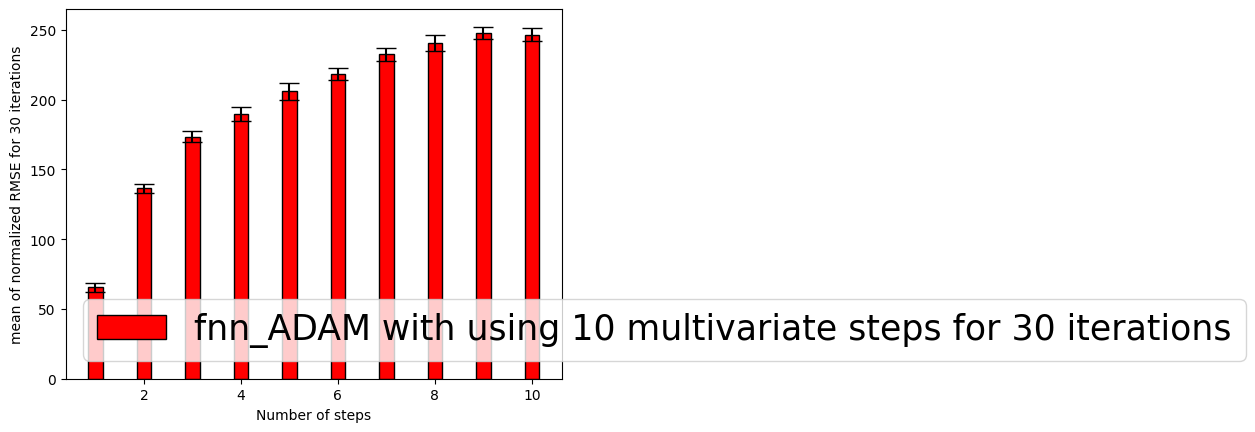

In [ ]:

ladam = []
# change file directory for different stations accordingly
file1 = open('results/AnandVihar/results_adam.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  ladam.append([float(li[k]) for k in range(10)])

dADAM=np.array(ladam)
print(dADAM.shape)
show_results(dADAM,'fnn_ADAM')


(30, 10)
r =  [[ 34.8294 171.7264 208.1257 216.4496 217.6785 213.0198 239.6543 247.3534
  233.9597 225.579 ]
 [ 36.2091 122.7452 156.5739 175.7127 185.4017 196.4128 223.4744 241.6891
  254.6172 265.4228]
 [ 47.1918 134.0221 182.1914 197.2595 212.3514 230.0466 246.7569 242.637
  250.1846 254.9084]
 [ 39.6689 130.1583 166.4658 165.5158 173.4677 188.0644 202.1632 219.8154
  246.7025 241.4902]
 [ 38.869  125.7243 161.919  178.627  187.3505 213.9164 231.5152 240.9359
  247.7216 239.3996]
 [ 41.9792 121.9712 164.8294 180.4253 195.0842 214.492  238.7616 259.0688
  265.8714 246.6921]
 [ 44.5704 124.8216 157.308  178.0791 199.2521 226.6943 244.1685 230.3157
  232.439  223.2194]
 [ 41.3999 153.0804 199.5948 198.055  202.3681 223.6552 233.7534 237.1957
  255.9544 265.6871]
 [ 40.421  125.8289 174.3947 186.5458 198.5026 216.0446 220.1866 227.0448
  232.7294 218.6687]
 [ 54.0047 128.3974 193.0306 200.8387 207.6843 233.4639 243.3785 241.8778
  242.2142 213.9881]
 [ 46.0849 134.2687 175.0942 187.2449

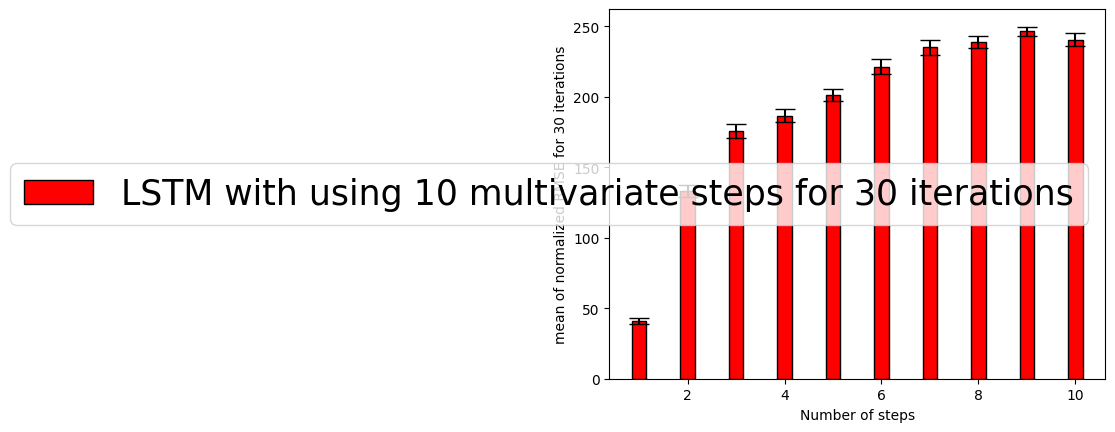

In [ ]:

dLSTM = []
file1 = open('results/AnandVihar/results_lstm.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  dLSTM.append([float(li[k]) for k in range(10)])

dLSTM=np.array(dLSTM)
print(dLSTM.shape)

show_results(dLSTM,'LSTM')

(30, 10)
r =  [[ 77.3906 153.4732 187.8558 199.1534 213.2893 219.9168 228.0883 238.9875
  241.6616 246.6648]
 [ 74.0595 159.7248 187.0563 205.1058 220.8086 229.2112 237.8556 246.969
  249.5335 249.9754]
 [ 67.696  163.6263 202.4277 222.2579 238.8244 245.0499 254.1666 261.1856
  260.4654 260.6474]
 [ 71.5715 137.0263 167.0889 188.5702 214.2927 237.6014 256.3894 268.781
  276.3417 278.872 ]
 [ 72.6379 159.3272 200.9881 234.0738 250.2232 257.3169 266.5421 270.8544
  269.9448 267.6345]
 [ 72.8822 140.2372 177.8372 200.2756 215.7812 225.6465 233.2974 237.3979
  238.393  234.8601]
 [ 84.5412 151.8049 172.5716 189.1901 208.9493 224.071  242.3942 252.3702
  257.9296 265.1507]
 [ 66.7    159.957  193.8437 216.2582 234.7602 239.3983 245.9796 253.3558
  256.4661 263.2622]
 [ 56.0388 152.6853 184.94   201.927  220.5177 228.7564 238.7212 247.6117
  248.0367 250.8917]
 [ 70.1032 149.8954 176.9742 200.1078 220.9904 226.9561 239.355  247.9316
  248.4904 250.0455]
 [ 62.6679 164.0102 195.3403 208.9467 

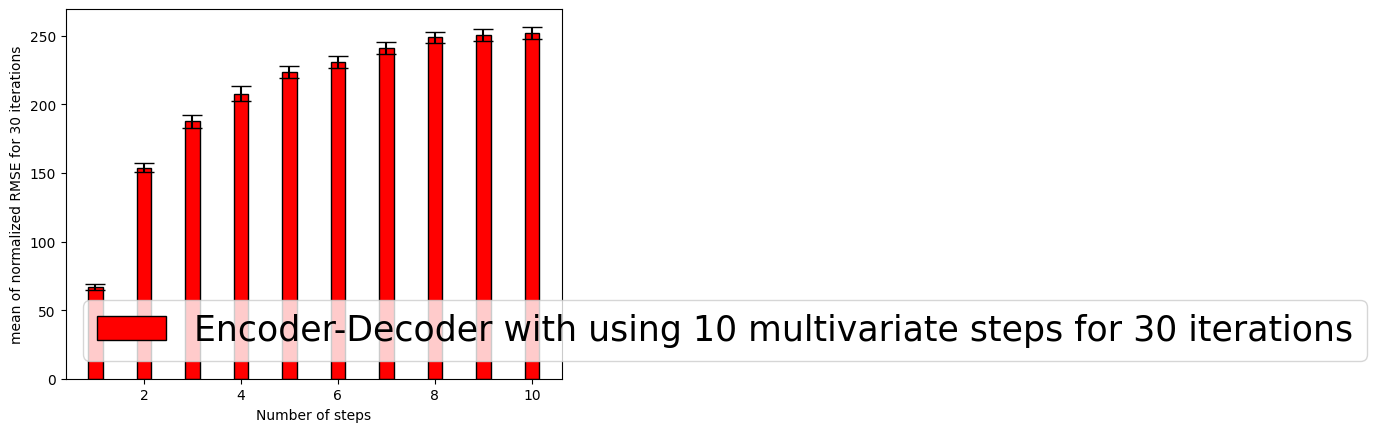

In [ ]:
dEN = []
file1 = open('results/AnandVihar/results_en_dc.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  dEN.append([float(li[k]) for k in range(10)])
dEN=np.array(dEN)
print(dEN.shape)
show_results(dEN,'Encoder-Decoder')

(30, 10)
r =  [[ 44.9464 135.1507 171.9552 183.383  196.1478 224.9862 249.4896 251.7067
  260.8614 256.4617]
 [ 40.8217 135.3387 168.5176 178.001  198.7992 219.3084 231.325  231.0075
  244.9365 236.9882]
 [ 38.9994 137.2052 165.6153 174.9582 183.8403 200.1882 224.4977 235.1362
  236.9293 228.3744]
 [ 35.2981 124.5894 158.038  171.4961 192.2528 204.0094 216.6573 237.395
  257.6058 269.479 ]
 [ 34.2841 129.8546 164.9132 181.8315 194.1352 208.3092 226.1468 241.337
  247.4534 230.8954]
 [ 53.068  149.8962 184.3019 201.54   211.7548 233.1553 251.3287 250.5586
  238.3918 248.0791]
 [ 42.2137 140.7741 162.5281 176.5875 198.8042 219.4136 238.4946 238.5394
  235.3154 228.0006]
 [ 35.8126 132.0493 155.9116 160.8127 178.5928 203.2918 237.3033 236.1286
  239.933  249.8009]
 [ 41.5967 139.1858 163.622  176.0167 194.1175 200.2542 208.3378 234.7459
  248.8866 219.6474]
 [ 38.3133 131.6257 179.5171 174.5882 191.9812 200.2862 224.009  223.7071
  236.9462 236.3769]
 [ 46.5868 132.8736 164.8958 179.0081 

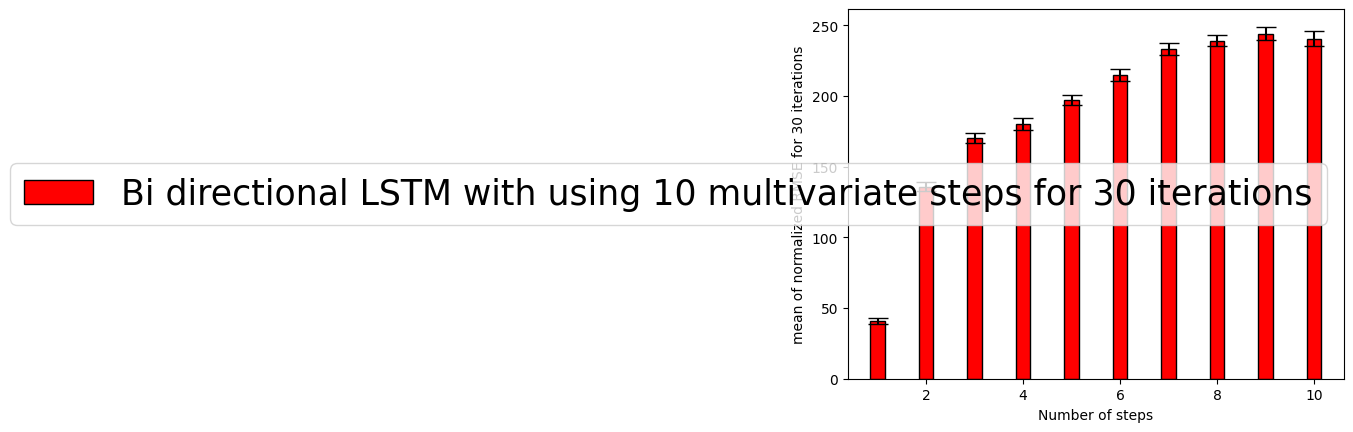

In [ ]:
dBI = []
file1 = open('results/AnandVihar/results_bi_lstm.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  dBI.append([float(li[k]) for k in range(10)])
dBI=np.array(dBI)
print(dBI.shape)
show_results(dBI,'Bi directional LSTM')

(30, 10)
r =  [[ 28.9796 143.6048 158.866  161.2892 185.7777 182.6583 182.863  190.1292
  179.6006 177.1616]
 [ 35.018  129.7989 154.0429 158.4206 177.0012 180.0176 180.5083 192.1166
  192.5313 195.1495]
 [ 30.6023 132.2798 159.1584 159.2039 180.7388 182.8632 182.6035 202.0358
  199.0071 196.9971]
 [ 37.8589 145.0428 182.2562 165.9997 187.9253 188.7197 182.6339 186.3258
  186.7863 186.5092]
 [ 26.4407 134.7562 166.8682 155.942  173.1557 174.5951 175.2982 191.7595
  189.3468 190.8963]
 [ 31.5471 141.5381 152.3499 159.761  175.8377 181.9858 185.0979 188.73
  185.288  182.8977]
 [ 36.4956 132.8901 157.1254 165.4111 179.2846 182.1322 186.1653 195.6784
  192.7168 192.2742]
 [ 36.8138 140.9255 168.1932 154.3587 171.2982 175.4788 171.255  182.8992
  181.4396 183.3661]
 [ 33.2567 125.2081 157.554  159.0168 172.5844 181.9061 185.0119 193.057
  188.3135 185.1329]
 [ 32.9087 136.7001 155.8939 156.6801 179.4432 182.6962 182.7554 194.9188
  187.7729 181.4644]
 [ 34.5218 132.9916 156.5404 156.8899 1

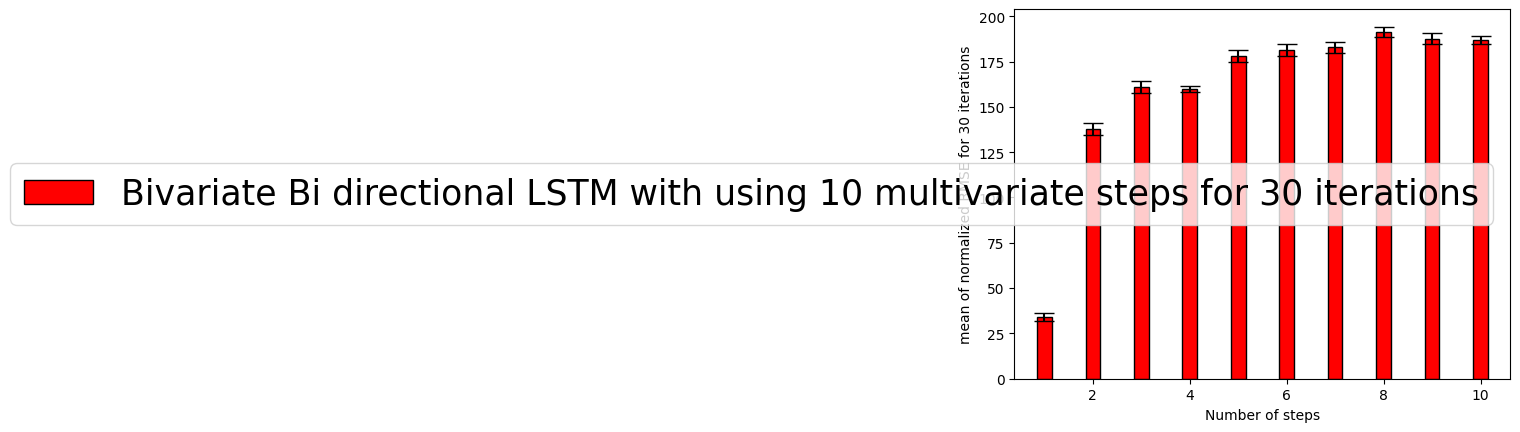

In [ ]:
dBbI = []
file1 = open('results/AnandVihar/results_bivariatebi_lstm.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  dBbI.append([float(li[k]) for k in range(10)])
dBbI=np.array(dBbI)
print(dBI.shape)
show_results(dBbI,'Bivariate Bi directional LSTM')

(30, 10)


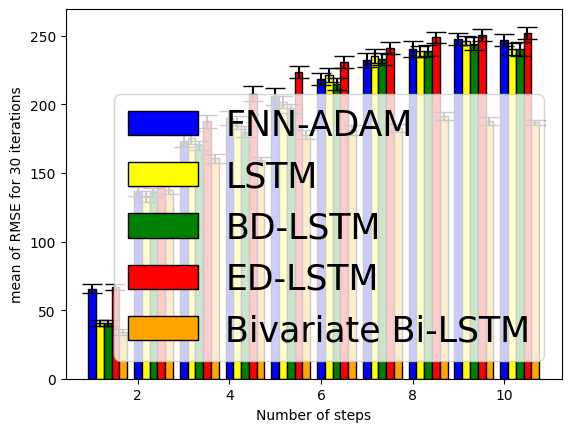

In [ ]:
def show_results_Combined(r1,r2,r3,r4, r5):
    x = datetime.datetime.now()
    print(r1.shape)
    u1=np.mean(r1,axis=0)
    u2=np.mean(r2,axis=0)
    u3=np.mean(r3,axis=0)
    u4=np.mean(r4,axis=0)
    u5 =np.mean(r5,axis=0)
    sigma1=np.std(r1,axis=0)
    sigma2=np.std(r2,axis=0)
    sigma3=np.std(r3,axis=0)
    sigma4=np.std(r4,axis=0)
    sigma5=np.std(r5,axis=0)
    barWidth = 0.17
    bars1=u1
    bars2=u2
    bars3=u3
    bars4=u4
    bars5=u5
    ra1= np.arange(len(bars1))+1
    ra2 = [y + barWidth for y in ra1]
    ra3 = [y + barWidth for y in ra2]
    ra4 = [y + barWidth for y in ra3]
    ra5 = [y + barWidth for y in ra4]
    plt.bar(ra1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=1.96*(sigma1/(np.sqrt(r1.shape[0]))), capsize=7, label='FNN-ADAM')
    plt.bar(ra2, bars2, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=1.96*(sigma2/(np.sqrt(r2.shape[0]))), capsize=7, label='LSTM')
    plt.bar(ra3, bars3, width = barWidth, color = 'green', edgecolor = 'black', yerr=1.96*(sigma3/(np.sqrt(r3.shape[0]))), capsize=7, label='BD-LSTM')
    plt.bar(ra4, bars4, width = barWidth, color = 'red', edgecolor = 'black', yerr=1.96*(sigma4/(np.sqrt(r4.shape[0]))), capsize=7, label='ED-LSTM')
    plt.bar(ra5, bars5, width = barWidth, color = 'orange', edgecolor = 'black', yerr=1.96*(sigma5/(np.sqrt(r5.shape[0]))), capsize=7, label='Bivariate Bi-LSTM')
    plt.ylabel('mean of RMSE for 30 iterations')
    plt.xlabel('Number of steps')
    plt.legend()
    plt.show()
show_results_Combined(dADAM,dLSTM,dBI,dEN, dBbI)
## Change the fontsize of legends according to convenience

In [ ]:
import plotly.graph_objects as go

u1=np.mean(dADAM,axis=0)
u2=np.mean(dLSTM,axis=0)
u3=np.mean(dEN,axis=0)
u4=np.mean(dBI,axis=0)
u5 =np.mean(dBbI,axis=0)
sigma1=np.array([1.96*(np.std(dADAM[:,k])/(np.sqrt(dADAM[:,k].shape[0]))) for k in range(10)])
sigma2=np.array([1.96*(np.std(dLSTM[:,k])/(np.sqrt(dLSTM[:,k].shape[0]))) for k in range(10)])
sigma3=np.array([1.96*(np.std(dEN[:,k])/(np.sqrt(dEN[:,k].shape[0]))) for k in range(10)])
sigma4=np.array([1.96*(np.std(dBI[:,k])/(np.sqrt(dBI[:,k].shape[0]))) for k in range(10)])
sigma5=np.array([1.96*(np.std(dBbI[:,k])/(np.sqrt(dBbI[:,k].shape[0]))) for k in range(10)])
fig = go.Figure()
df=pd.DataFrame()
df['ADAM']=u1
df['LSTM']=u2
df['EN']=u3
df['BI']=u4
df['BbI'] = u5
df['steps']=[1,2,3,4,5,6,7,8,9,10]
# fig.add_trace(go.Bar(x=df['steps'],
#                 y=df['ADAM'],
#                      error_y=dict(type='data', array=sigma1),
#                 name='FNN-ADAM',
#                 marker_color='rgb(55, 83, 109)'
#                 ))
# fig.add_trace(go.Bar(x=df['steps'],
#                 y=df['LSTM'],
#                 error_y=dict(type='data', array=sigma2),
#                 name='LSTM',
#                 marker_color='rgb(200,125,150)'
#                 ))
fig.add_trace(go.Bar(x=df['steps'],
                y=df['EN'],
                error_y=dict(type='data', array=sigma3),
                name='ED-LSTM',
                marker_color='rgb(13, 255, 20)'
                ))
fig.add_trace(go.Bar(x=df['steps'],
                y=df['BI'],
                error_y=dict(type='data', array=sigma4),
                name='BD-LSTM',
                marker_color='rgb(255, 10, 10)'
                ))
fig.add_trace(go.Bar(x=df['steps'],
                y=df['BbI'],
                error_y=dict(type='data', array=sigma4),
                name='Bivariate BD-LSTM',
                marker_color='rgb(255, 200, 10)'
                ))
fig.update_layout(
    #title='mean of RMSE for 30 iterations' ,
    width = 800,
    xaxis_tickfont_size=20,
    xaxis=dict(
        title='Step Size',
        titlefont_size=18,
        tickfont_size=20,
    ),
    yaxis=dict(
        title='RMSE(Mean)',
        titlefont_size=18,
        tickfont_size=20,
    ),
    legend=dict(
        x=0,
        y=1.0,
        font=dict(
            size=12
        ),
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.25, # gap between bars of adjacent location coordinates.
    bargroupgap=0.05# gap between bars of the same location coordinate.


)
fig.show()

In [ ]:
from google.colab import files
import shutil

# Path to the folder you want to zip
folder_path = "/content/results/AnandVihar"

# Output zip file name (without .zip)
zip_name = "AnandVihar_allmodels_results_final_all_models"

# Zip the folder
shutil.make_archive(zip_name, 'zip', folder_path)

# Download the zipped file
files.download(f"{zip_name}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data Preparation 1: Random Shuffling

In [ ]:

def Shuffled_BiLSTM(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features,minv,maxv):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu', input_shape=(n_hours,n_features))))
    model.add(Dense(n_out))
    model.compile(optimizer='adam', loss='mse')
# fit model
    model.fit(train_X, train_y, epochs=64, batch_size=20, validation_data=(val_X, val_y), verbose=0, shuffle= True)
    yhat11 = model.predict(test_X, verbose=0)
    yhat11_inv = ((maxv - minv) * yhat11  + minv)
    test_y_inv = ((maxv - minv) * test_y  + minv)
    print("Predicted = ", yhat11_inv)
    print("Actual = ", test_y_inv)
    err = np.sqrt(((np.sum((yhat11_inv-test_y_inv)**2,axis=0))))
    print("RMSE error using ",n_hours," state size to predict ",n_out," step is =",err )
    yhat12 = model.predict(train_X, verbose = 0)
    yhat12_inv = ((maxv - minv) * yhat12  + minv)
    train_y_inv = ((maxv - minv) * train_y  + minv)
    err2 = np.sqrt(((np.sum((yhat12_inv-train_y_inv)**2,axis=0))))
    print("RMSE error using ",n_hours," state size to predict ",n_out," step for train is =",err2 )
    return err , err2


time1 = time.time()
outfile_bilstm_shuffled = open('results/AnandVihar/results_bilstm_shuffled.txt','a+')
train_shuffled_bilstm = open('results/AnandVihar/bilstm_shuffled_train.txt','a+')
for i,k in enumerate(out_range):
    for j in range(1,31):
        for m in range(5,6):
            n_out=k
            n_hours=m
            print("Number of steps predicted= ",n_out,"Number of steps Multivariate threads ussed= ",n_hours, "iteration number= ",j)

            train_X, train_y = split_sequences(scaled_train_df, n_hours, n_out, target_col_name='PM2.5')
            val_X, val_y     = split_sequences(scaled_test_df, n_hours, n_out, target_col_name='PM2.5')

            print(val_X.shape,val_y.shape)
            test_X, test_y = val_X[288:,:,:],val_y[288:,:]
            val_X, val_y = val_X[0:288,:,:],val_y[0:288,:]
            print("train_X.shape, train_y.shape, test_X.shape, test_y.shape=",train_X.shape, train_y.shape, test_X.shape, test_y.shape)
            print("val X, val y",val_X.shape, val_y.shape)
            n_features = train_X.shape[2]
            print("n_features = ",n_features)
            err , err2= Shuffled_BiLSTM(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features,minv,maxv)
            allres = np.array(err)
            allres2 = np.array(err2)
            for item in allres:
              item = round(item,4)
              outfile_bilstm_shuffled.write(str(item) + "  ")
            for item in allres2:
              item = round(item,4)
              train_shuffled_bilstm.write(str(item) + "  ")
            #np.savetxt(outfile_bilstm_shuffled,  allres  , fmt='%1.4f', newline=' ' )
            #np.savetxt(train_shuffled_bilstm,  allres2  , fmt='%1.4f', newline=' ' )
        outfile_bilstm_shuffled.write("\n")
        train_shuffled_bilstm.write("\n")

outfile_bilstm_shuffled.close()
train_shuffled_bilstm.close()
time2 = time.time()
print("MODEL_time:",time2-time1)
#np.savetxt("10i_"+str(result.shape[1])+"o_FNN_adam_"+str(result.shape[0])+"i.csv"+str(datetime.datetime.now()), result, delimiter=",")


Number of steps predicted=  10 Number of steps Multivariate threads ussed=  5 iteration number=  1
(564, 5, 13) (564, 10)
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (1538, 5, 13) (1538, 10) (276, 5, 13) (276, 10)
val X, val y (288, 5, 13) (288, 10)
n_features =  13
Predicted =  [[ 9.318632   9.6339245  9.9724865 ... 12.693026  11.745985  11.294394 ]
 [ 9.155626  10.474198   8.563057  ... 10.174062   9.23245    8.9836445]
 [16.556492  10.69878    7.675012  ...  8.941891   9.906643  11.5046215]
 ...
 [32.18111   24.406334  19.789587  ... 20.809952  21.328268  23.151468 ]
 [35.415028  32.764637  19.420715  ... 22.03482   18.588062  23.53821  ]
 [45.750477  33.411106  24.089073  ... 21.84686   20.438332  25.246052 ]]
Actual =  [[ 9.779832  9.183771 19.763584 ...  8.710033  9.828554  9.647144]
 [ 9.183771 19.763584  9.964352 ...  9.828554  9.647144  9.180661]
 [19.763584  9.964352  9.171332 ...  9.647144  9.180661 10.462969]
 ...
 [31.523079 33.783962 47.046566 ... 28.814373 

Data Preparation 2: Univariate vs Multivariate Analysis using our best model- Bi-LSTM

In [ ]:

# def split_sequences_univariate(sequences, n_steps_in, n_steps_out):
#     X, y = list(), list()
#     for i in range(len(sequences)):
#     # find the end of this pattern
#         end_ix = i + n_steps_in
#         out_end_ix = end_ix + n_steps_out-1
#     # check if we are beyond the dataset
#         if out_end_ix > len(sequences):
#             break
#         # gather input and output parts of the pattern

#         seq_x, seq_y = sequences[i:end_ix], sequences[end_ix-1:out_end_ix]
#         X.append(seq_x)
#         y.append(seq_y)
#     return array(X), array(y)

def split_sequences_univariate(sequences, n_steps_in, n_steps_out):


    X, y = [], []
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # break if output goes beyond dataset length
        if out_end_ix > len(sequences):
            break

        # strictly non-overlapping: target starts *after* input ends
        seq_x = sequences[i:end_ix]
        seq_y = sequences[end_ix:out_end_ix]

        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

def MODEL_Univariate_Bi_LSTM(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features,minv,maxv):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu', input_shape=(n_hours,n_features))))
    model.add(Dense(n_out))
    model.compile(optimizer='adam', loss='mse')
    model.fit(train_X, train_y, epochs=1000, batch_size=20, validation_data=(val_X, val_y), verbose=0, shuffle=False)
    yhat11 = model.predict(test_X, verbose=0)
    yhat11_inv = ((maxv - minv) * yhat11  + minv)
    test_y_inv = ((maxv - minv) * test_y  + minv)
    print("Predicted = ", yhat11_inv)
    print("Actual = ", test_y_inv)
    err = np.sqrt(((np.sum((yhat11_inv-test_y_inv)**2,axis=0))))
    print("RMSE error using ",n_hours," state size to predict ",n_out," step is =",err )
    yhat12 = model.predict(train_X, verbose = 0)
    yhat12_inv = ((maxv - minv) * yhat12  + minv)
    train_y_inv = ((maxv - minv) * train_y  + minv)
    err2 = np.sqrt(((np.sum((yhat12_inv-train_y_inv)**2,axis=0))))
    print("RMSE error using ",n_hours," state size to predict ",n_out," step for train is =",err2 )
    return err , err2



dataset_train = read_csv('train_pollution.csv', header=0, index_col=0)
dataset_test = read_csv('test_pollution.csv', header=0, index_col=0)
values_train = dataset_train.values
values_test = dataset_test.values
values_train = dataset_train['PM2.5'].values
values_test = dataset_test['PM2.5'].values

values_train = values_train.astype('float32')
values_test = values_test.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
concat = np.concatenate((values_train,values_test),axis = 0)
print(concat.shape)
maxv = max(concat)
minv = min(concat)
scaled = (concat-minv)/(maxv-minv)
scaled_train = scaled[:values_train.shape[0]]
scaled_test = scaled[values_train.shape[0]:]
outfile_bi_lstm = open('results/AnandVihar/results_bi_lstm_univariate.txt','a+')
train_bi_lstm = open('results/AnandVihar/bi_lstm_univarate_train.txt','a+')
time1 = time.time()
for i,k in enumerate(out_range):
    for j in range(1,31):
        for m in range(5,6):
            n_out=k
            n_hours=m
            print("Number of steps predicted= ",n_out,"Number of steps Multivariate threads ussed= ",n_hours, "iteration number= ",j)

            train_X, train_y = split_sequences_univariate(scaled_train,n_hours,n_out)
            val_X, val_y = split_sequences_univariate(scaled_test,n_hours,n_out)
            val_X = val_X.reshape(val_X.shape[0] , val_X.shape[1] , 1)
            train_X = train_X.reshape(train_X.shape[0] , train_X.shape[1] , 1)
            print(val_X.shape,val_y.shape)
            test_X, test_y = val_X[288:,:,:],val_y[288:,:]
            val_X, val_y = val_X[0:288,:,:],val_y[0:288,:]
            print("train_X.shape, train_y.shape, test_X.shape, test_y.shape=",train_X.shape, train_y.shape, test_X.shape, test_y.shape)
            print("val X, val y",val_X.shape, val_y.shape)
            n_features = 1
            err , err2=MODEL_Univariate_Bi_LSTM(train_X,test_X,train_y,test_y,val_X,val_y,n_out,n_hours,n_features,minv,maxv)
            allres = np.array(err)
            allres2 = np.array(err2)
            for item in allres:
              item = round(item,4)
              outfile_bi_lstm.write(str(item) + "  ")
            for item in allres2:
              item = round(item,4)
              train_bi_lstm.write(str(item) + "  ")
            #np.savetxt(outfile_bi_lstm,  allres  , fmt='%1.4f', newline=' ' )
            #np.savetxt(train_bi_lstm,  allres2  , fmt='%1.4f', newline=' ' )
        outfile_bi_lstm.write("\n")
        train_bi_lstm.write("\n")

outfile_bi_lstm.close()
train_bi_lstm.close()

time2 = time.time()
print("MODEL_Bi_LSTM:",time2-time1)

(2128,)
Number of steps predicted=  10 Number of steps Multivariate threads ussed=  5 iteration number=  1
(563, 5, 1) (563, 10)
train_X.shape, train_y.shape, test_X.shape, test_y.shape= (1537, 5, 1) (1537, 10) (275, 5, 1) (275, 10)
val X, val y (288, 5, 1) (288, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Predicted =  [[ 51.060486  58.465763  55.899387 ...  65.50544   67.21104   62.860718]
 [ 50.26674   49.853374  52.634094 ...  61.142963  59.556034  68.92366 ]
 [110.16358   72.4686   105.03356  ...  90.954956 112.04741   78.14205 ]
 ...
 [195.79736  169.30464  221.38594  ... 201.11755  219.66768  230.02206 ]
 [217.07236  275.41544  282.60876  ... 288.7974   317.72986  283.4183  ]
 [264.74152  222.67749  202.72508  ... 211.03432  232.33928  291.14194 ]]
Actual =  [[ 44.19 146.25  51.72 ...  50.41  48.66  44.16]
 [146.25  51.72  44.07 ...  48.66  44.16  56.53]
 [ 51.72  44.07  30.   ...  44.16  56.53  56.28]
 ...
 [259.69 281.5  409.44 ... 233.56 330.22 301.69]
 [281.5  409.44 287.5  ... 330.22 301.69 182.78]
 [409.44 287.5  279.81 ... 301.69 182.78 201.  ]]
RMSE error using  5  state size to predict  10  step is = [1472.2004 1807.2754 2049.8806 2340.3613 2282.719  2361.871  2181.0552
 2116.327  2104.1672 2011.4698]
RMSE error using  5  state size to predict  10  step for train is = [168

In [ ]:
shuffled = []
file1 = open('results/AnandVihar/results_bilstm_shuffled.txt','r')
#file1 = open('results/AnandVihar/1_shuffled_test.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  shuffled.append([float(li[k]) for k in range(10)])
shuffled = np.array(shuffled)
flat_shuffled = np.ravel(shuffled , order = 'F')
print("Mean = ", np.mean(flat_shuffled))
print("Error = ", 1.96*(np.std(flat_shuffled)/(np.sqrt(flat_shuffled.shape[0]))))

Mean =  194.62326366666665
Error =  7.207829169778665


Plotting for results of different models

In [ ]:
##Get the test results
#FNN-ADAM
dADAM_train = []
file1 = open('results/AnandVihar/adam_train.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  dADAM_train.append([float(li[k]) for k in range(10)])
dADAM_train=np.array(dADAM_train)

#LSTM
dLSTM_train = []
file1 = open('results/AnandVihar/lstm_train.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  dLSTM_train.append([float(li[k]) for k in range(10)])
dLSTM_train=np.array(dLSTM_train)

#ED-LSTM
dEN_train = []
file1 = open('results/AnandVihar/en_dc_train.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  dEN_train.append([float(li[k]) for k in range(10)])
dEN_train=np.array(dEN_train)

#BD-LSTM
dBI_train = []
file1 = open('results/AnandVihar/bi_lstm_train.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  dBI_train.append([float(li[k]) for k in range(10)])
dBI_train=np.array(dBI_train)

dBbI_train = []
file1 = open('results/AnandVihar/bivariatebi_lstm_train.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  dBbI_train.append([float(li[k]) for k in range(10)])
dBbI_train=np.array(dBI_train)
#BD-LSTM*
shuffled_train = []
file1 = open('results/AnandVihar/bilstm_shuffled_train.txt','r')
#file1 = open('results/AnandVihar/1_shuffled_train.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  shuffled_train.append([float(li[k]) for k in range(10)])
shuffled_train=np.array(shuffled_train)

shuffled_train = []
file1 = open('results/AnandVihar/bilstm_shuffled_train.txt','r')
#file1 = open('results/AnandVihar/1_shuffled_train.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  shuffled_train.append([float(li[k]) for k in range(10)])
shuffled_train=np.array(shuffled_train)

#UBD-LSTM
UBD_train = []
file1 = open('results/AnandVihar/bi_lstm_univarate_train.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  UBD_train.append([float(li[k]) for k in range(10)])
UBD_train=np.array(UBD_train)
#SBD-LSTM
# SBD_train = []
# file1 = open('results/AnandVihar/seasonal_bi_lstm_train.txt','r')
# #file1 = open('results/AnandVihar/1_seasonal_train.txt','r')
# Lines = file1.readlines()
# for line in Lines:
#   strline = line.strip()
#   li = strline.split()
#   li = li[:10]
#   SBD_train.append([float(li[k]) for k in range(10)])
# SBD_train=np.array(SBD_train)

In [ ]:
## Corresponding Test RMSE with Mean and Error across 10 horizons
#flat_dSGD = np.ravel(dSGD , order = 'F')
flat_dADAM = np.ravel(dADAM , order = 'F')
flat_dLSTM = np.ravel(dLSTM , order = 'F')
flat_dEN = np.ravel(dEN , order = 'F')
flat_dBI = np.ravel(dBI , order = 'F')
flat_dBbI = np.ravel(dBbI , order = 'F')
dBI_univ = []
file1 = open('results/AnandVihar/results_bi_lstm_univariate.txt','r')
Lines = file1.readlines()
for line in Lines:
  strline = line.strip()
  li = strline.split()
  li = li[:10]
  dBI_univ.append([float(li[k]) for k in range(10)])
dBI_univ = np.array(dBI_univ)
flat_dBI_univ = np.ravel(dBI_univ , order = 'F')

# dBI_season = []
# file1 = open('results/AnandVihar/result_seasonal_bi_lstm.txt','r')
# #file1 = open('results/AnandVihar/1_seasonal_test.txt','r')
# Lines = file1.readlines()
# for line in Lines:
#   strline = line.strip()
#   li = strline.split()
#   li = li[:10]
#   dBI_season.append([float(li[k]) for k in range(10)])
# dBI_season = np.array(dBI_season)
# flat_dBI_season = np.ravel(dBI_season , order = 'F')

#m1 = np.mean(flat_dSGD)
m2 = np.mean(flat_dADAM)
m3 = np.mean(flat_dLSTM)
m4 = np.mean(flat_dEN)
m5 = np.mean(flat_dBI)
m6 = np.mean(flat_dBI_univ)
m7 = np.mean(flat_shuffled)
m8 = np.mean(flat_dBbI)
# m8 = np.mean(flat_dBI_season)

#s1 = 1.96*(np.std(flat_dSGD)/(np.sqrt(flat_dSGD.shape[0])))
s2 = 1.96*(np.std(flat_dADAM)/(np.sqrt(flat_dADAM.shape[0])))
s3 = 1.96*(np.std(flat_dLSTM)/(np.sqrt(flat_dLSTM.shape[0])))
s4 = 1.96*(np.std(flat_dEN)/(np.sqrt(flat_dEN.shape[0])))
s5 = 1.96*(np.std(flat_dBI)/(np.sqrt(flat_dBI.shape[0])))
s6 = 1.96*(np.std(flat_dBI_univ)/(np.sqrt(flat_dBI_univ.shape[0])))
s7 = 1.96*(np.std(flat_shuffled)/(np.sqrt(flat_shuffled.shape[0])))
s8 = 1.96*(np.std(flat_dBbI)/(np.sqrt(flat_dBbI.shape[0])))
# s8 = 1.96*(np.std(flat_dBI_season)/(np.sqrt(flat_dBI_season.shape[0])))

## Corresponding Train RMSE with Mean and Error across 10 horizons
flat_dADAM_train = np.ravel(dADAM_train , order = 'F')
flat_dLSTM_train = np.ravel(dLSTM_train , order = 'F')
flat_dEN_train = np.ravel(dEN_train , order = 'F')
flat_dBI_train = np.ravel(dBI_train , order = 'F')
flat_shuffled_train = np.ravel(shuffled_train , order = 'F')
flat_UBD_train = np.ravel(UBD_train , order = 'F')
flat_dBbI_train = np.ravel(dBbI_train , order = 'F')
# flat_SBD_train = np.ravel(SBD_train , order = 'F')

n2 = np.mean(flat_dADAM_train)
n3 = np.mean(flat_dLSTM_train)
n4 = np.mean(flat_dEN_train)
n5 = np.mean(flat_dBI_train)
n6 = np.mean(flat_UBD_train)
n7 = np.mean(flat_shuffled_train)
n8 = np.mean(flat_dBbI_train)
# n8 = np.mean(flat_SBD_train)

t2 = 1.96*(np.std(flat_dADAM_train)/(np.sqrt(flat_dADAM_train.shape[0])))
t3 = 1.96*(np.std(flat_dLSTM_train)/(np.sqrt(flat_dLSTM_train.shape[0])))
t4 = 1.96*(np.std(flat_dEN_train)/(np.sqrt(flat_dEN_train.shape[0])))
t5 = 1.96*(np.std(flat_dBI_train)/(np.sqrt(flat_dBI_train.shape[0])))
t8 = 1.96*(np.std(flat_dBbI_train)/(np.sqrt(flat_dBbI_train.shape[0])))
t6 = 1.96*(np.std(flat_UBD_train)/(np.sqrt(flat_UBD_train.shape[0])))
t7 = 1.96*(np.std(flat_shuffled_train)/(np.sqrt(flat_shuffled_train.shape[0])))
# t8 = 1.96*(np.std(flat_SBD_train)/(np.sqrt(flat_SBD_train.shape[0])))

X = ['Train','Test']
fig = go.Figure()

fig.add_trace(go.Bar(x= X,
                y=np.array([n2,m2]),
                     error_y=dict(type='data', array= np.array([t2,s2])),
                name='FNN-ADAM',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x= X,
                y= np.array([n3,m3]),
                error_y=dict(type='data', array= np.array([t3,s3])),
                name='LSTM',
                marker_color='rgb(200,125,150)'
                ))
fig.add_trace(go.Bar(x=X,
                y= np.array([n4,m4]),
                error_y=dict(type='data', array= np.array([t4,s4])),
                name='ED-LSTM',
                marker_color='rgb(13, 255, 20)'
                ))
fig.add_trace(go.Bar(x=X,
                y= np.array([n5,m5]),
                error_y=dict(type='data', array= np.array([t5,s5])),
                name='BD-LSTM',
                marker_color='rgb(255, 10, 10)'
                ))
fig.add_trace(go.Bar(x=X,
                y= np.array([n8,m8]),
                error_y=dict(type='data', array= np.array([t5,s5])),
                name='Bivariate BD-LSTM',
                marker_color='rgb(255, 200, 10)'
                ))


fig.update_layout(
    #title='Mean and Error of RMSE for 10 prediction horizons' ,
    xaxis_tickfont_size=20,
    width = 750,
    yaxis=dict(
        title='RMSE(Mean)',
        titlefont_size=20,
        tickfont_size=20,
    ),
    legend=dict(
        x=0.94,
        y=1.0,
        font = dict(size = 18),
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.2, # gap between bars of adjacent location coordinates.
    bargroupgap=0.05# gap between bars of the same location coordinate.

)
fig.show()

In [ ]:
X = ['Train','Test']
fig = go.Figure()
fig.add_trace(go.Bar(x=X,
                y= np.array([n5,m5]),
                error_y=dict(type='data', array= np.array([t5,s5])),
                name='BD-LSTM',
                marker_color='rgb(255, 10, 10)'
                ))
fig.add_trace(go.Bar(x= X,
                y=np.array([n8,m8]),
                     error_y=dict(type='data', array= np.array([t8,s8])),
                name='Bivariate BD-LSTM*',
                marker_color='orange'
                ))
fig.add_trace(go.Bar(x=X,
                y= np.array([n6,m6]),
                error_y=dict(type='data', array= np.array([t6,s6])),
                name='UBD-LSTM',
                marker_color='lightseagreen'
                ))

# fig.add_trace(go.Bar(x=X,
#                 y= np.array([n8,m8]),
#                 error_y=dict(type='data', array= np.array([t8,s8])),
#                 name='SBD-LSTM',
#                 marker_color='darkblue'
#                 ))


fig.update_layout(
    #title='Mean and Error of RMSE for 10 prediction horizons' ,
    xaxis_tickfont_size=20,
    width = 700,
    yaxis=dict(
        title='RMSE(Mean)',
        titlefont_size=20,
        tickfont_size=20,
    ),
    legend=dict(
        x=0.94,
        y=1.0,
        font = dict(size = 18),
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.2, # gap between bars of adjacent location coordinates.
    bargroupgap=0.05# gap between bars of the same location coordinate.

)
fig.show()

Table for all time steps


In [ ]:
# row_train_mean = [n2,n3,n4,n5,n7,n6,n8,t2,t3,t4,t5,t7,t6,t8]
# row_test_mean = [m2,m3,m4,m5,m7,m6,m8,s2,s3,s4,s5,s7,s6,s8]
# all_meth = [dADAM, dLSTM, dEN, dBI, shuffled, dBI_univ, dBI_season]
# step1_mean = [np.mean(arr[:,0]) for arr in all_meth]
# step1_err = [1.96*(np.std(arr[:,0])/(np.sqrt(arr[:,0].shape[0]))) for arr in all_meth]
# step2_mean = [np.mean(arr[:,1]) for arr in all_meth]
# step2_err = [1.96*(np.std(arr[:,1])/(np.sqrt(arr[:,1].shape[0]))) for arr in all_meth]
# step3_mean = [np.mean(arr[:,2]) for arr in all_meth]
# step3_err = [1.96*(np.std(arr[:,2])/(np.sqrt(arr[:,2].shape[0]))) for arr in all_meth]
# step4_mean = [np.mean(arr[:,3]) for arr in all_meth]
# step4_err = [1.96*(np.std(arr[:,3])/(np.sqrt(arr[:,3].shape[0]))) for arr in all_meth]
# step5_mean = [np.mean(arr[:,4]) for arr in all_meth]
# step5_err = [1.96*(np.std(arr[:,4])/(np.sqrt(arr[:,4].shape[0]))) for arr in all_meth]
# step6_mean = [np.mean(arr[:,5]) for arr in all_meth]
# step6_err = [1.96*(np.std(arr[:,5])/(np.sqrt(arr[:,5].shape[0]))) for arr in all_meth]
# step7_mean = [np.mean(arr[:,6]) for arr in all_meth]
# step7_err = [1.96*(np.std(arr[:,6])/(np.sqrt(arr[:,6].shape[0]))) for arr in all_meth]
# step8_mean = [np.mean(arr[:,7]) for arr in all_meth]
# step8_err = [1.96*(np.std(arr[:,7])/(np.sqrt(arr[:,7].shape[0]))) for arr in all_meth]
# step9_mean = [np.mean(arr[:,8]) for arr in all_meth]
# step9_err = [1.96*(np.std(arr[:,8])/(np.sqrt(arr[:,8].shape[0]))) for arr in all_meth]
# step10_mean = [np.mean(arr[:,9]) for arr in all_meth]
# step10_err = [1.96*(np.std(arr[:,9])/(np.sqrt(arr[:,9].shape[0]))) for arr in all_meth]
# ##print the corresponding list to get mean/error

1 months ahead prediction using Univariate UBD-LSTM model

Training model...
Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 985ms/step - loss: 0.0328 - val_loss: 0.0379
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 0.0312 - val_loss: 0.0360
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.0296 - val_loss: 0.0342
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 0.0276 - val_loss: 0.0324
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 0.0255 - val_loss: 0.0304
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step - loss: 0.0238 - val_loss: 0.0284
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.0221 - val_loss: 0.0261
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 0.0198 - val_loss: 0.0238
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - loss: 0.0178 - val_loss: 0.0218
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.0166 - val_loss: 0.0203
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 0.0156 - val_loss: 0.0192
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━

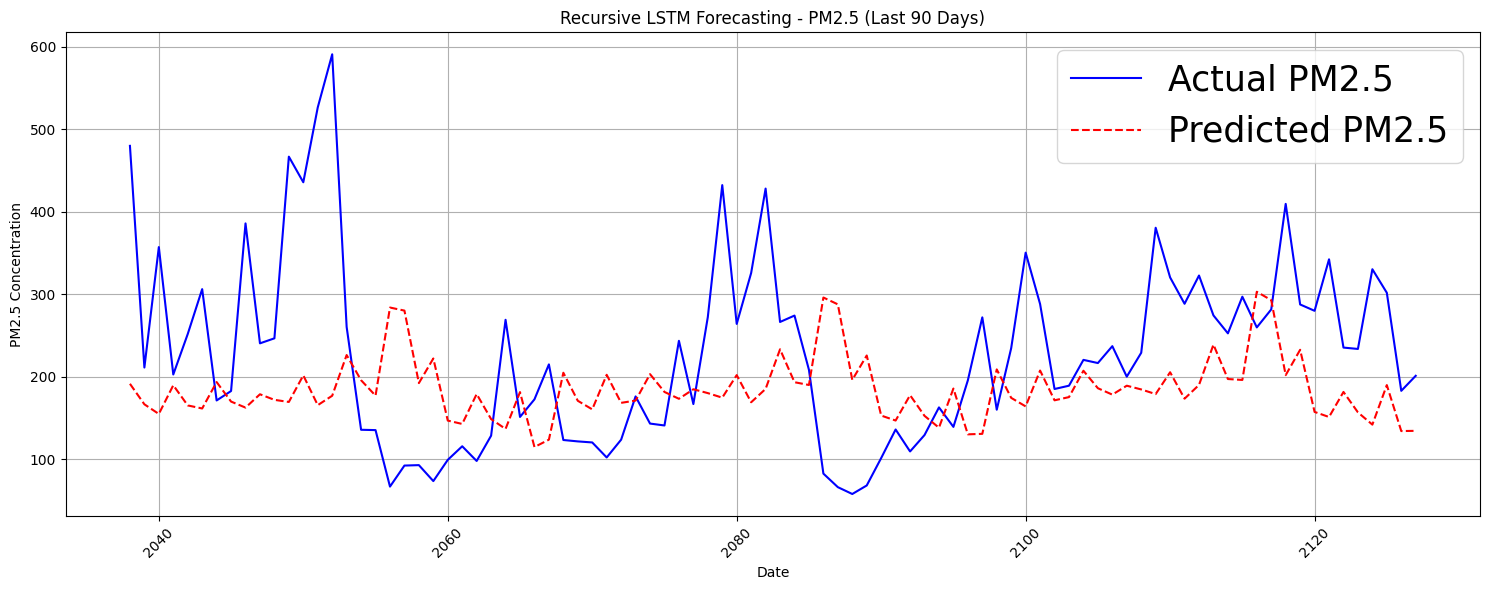

In [ ]:
# One Month Ahead Prediction
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# === Split univariate sequence into samples ===
def split_sequences_univariate(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(0, len(sequences) - n_steps_in - n_steps_out + 1, n_steps_in):
        seq_x = sequences[i:i + n_steps_in]
        seq_y = sequences[i + n_steps_in:i + n_steps_in + n_steps_out]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# === Custom Weighted MSE Loss to emphasize PM2.5 peaks ===
def weighted_mse(y_true, y_pred):
    threshold = 0.75
    weight_high = 6.0
    weights = 1.0 + weight_high * tf.cast(tf.greater(y_true, threshold), tf.float32)
    return tf.reduce_mean(weights * tf.square(y_pred - y_true), axis=-1)

# === Bidirectional LSTM Training Model ===
def train_model(train_X, train_y, val_X, val_y, n_out, n_hours, n_features):
    model = Sequential()
    model.add(Input(shape=(n_hours, n_features)))
    model.add(Bidirectional(LSTM(64, activation='relu')))
    model.add(Dropout(0.2))
    model.add(Dense(n_out))
    model.compile(optimizer='adam', loss=weighted_mse)

    early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    model.fit(train_X, train_y,
              epochs=1000,
              batch_size=32,
              validation_data=(val_X, val_y),
              callbacks=[early_stop],
              verbose=1,
              shuffle=False)
    return model

# === Prepare inference model (same architecture) ===
def prepare_inference_model(trained_model, n_hours, n_features, n_out):
    model = Sequential()
    model.add(Input(shape=(n_hours, n_features)))
    model.add(Bidirectional(LSTM(64, activation='relu')))
    model.add(Dropout(0.2))
    model.add(Dense(n_out))

    model.build(input_shape=(None, n_hours, n_features))
    model.set_weights(trained_model.get_weights())
    model.compile(optimizer='adam', loss='mse')  # Regular MSE okay for inference
    return model

# === Load data ===
dataset_train = read_csv('train_pollution.csv', header=0, index_col=0)
dataset_test = read_csv('test_pollution.csv', header=0, index_col=0)

train_vals = dataset_train['PM2.5'].values.astype('float32')
test_vals = dataset_test['PM2.5'].values.astype('float32')

scaler = MinMaxScaler()
full_series = np.concatenate((train_vals, test_vals)).reshape(-1, 1)
scaled_series = scaler.fit_transform(full_series).flatten()

scaled_train = scaled_series[:len(train_vals)]
scaled_test = scaled_series[len(train_vals):]

# === Configuration ===
n_hours = 30         # input steps
n_out = 30           # output steps
n_total_forecast = 90
n_features = 1

# === Create sequences ===
train_X, train_y = split_sequences_univariate(scaled_train, n_hours, n_out)
val_X, val_y = split_sequences_univariate(scaled_test, n_hours, n_out)

train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
val_X = val_X.reshape((val_X.shape[0], n_hours, n_features))

# === Train model ===
print("Training model...")
model = train_model(train_X, train_y, val_X[:288], val_y[:288], n_out, n_hours, n_features)

# === Prepare inference model ===
infer_model = prepare_inference_model(model, n_hours, n_features, n_out)

# === Recursive prediction ===
current_input = val_X[-1].reshape(1, n_hours, 1)
predictions = []
steps_remaining = n_total_forecast

while steps_remaining > 0:
    n_pred = min(n_out, steps_remaining)
    output = infer_model.predict(current_input, verbose=0).flatten()
    predictions.extend(output[:n_pred])

    new_input_seq = np.append(current_input.flatten()[n_pred:], output[:n_pred])
    current_input = new_input_seq[-n_hours:].reshape(1, n_hours, 1)
    steps_remaining -= n_pred

# === Inverse transform ===
predicted_pm25 = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actual_pm25 = scaler.inverse_transform(scaled_test[-90:].reshape(-1, 1)).flatten()
dates = dataset_test.index[-90:]

# === Metrics ===
rmse = math.sqrt(mean_squared_error(actual_pm25, predicted_pm25))
mae = mean_absolute_error(actual_pm25, predicted_pm25)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}')

# === Plot ===
plt.figure(figsize=(15, 6))
plt.plot(dates, actual_pm25, label='Actual PM2.5', color='blue')
plt.plot(dates, predicted_pm25, label='Predicted PM2.5', color='red', linestyle='--')
plt.title("Recursive LSTM Forecasting - PM2.5 (Last 90 Days)")
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


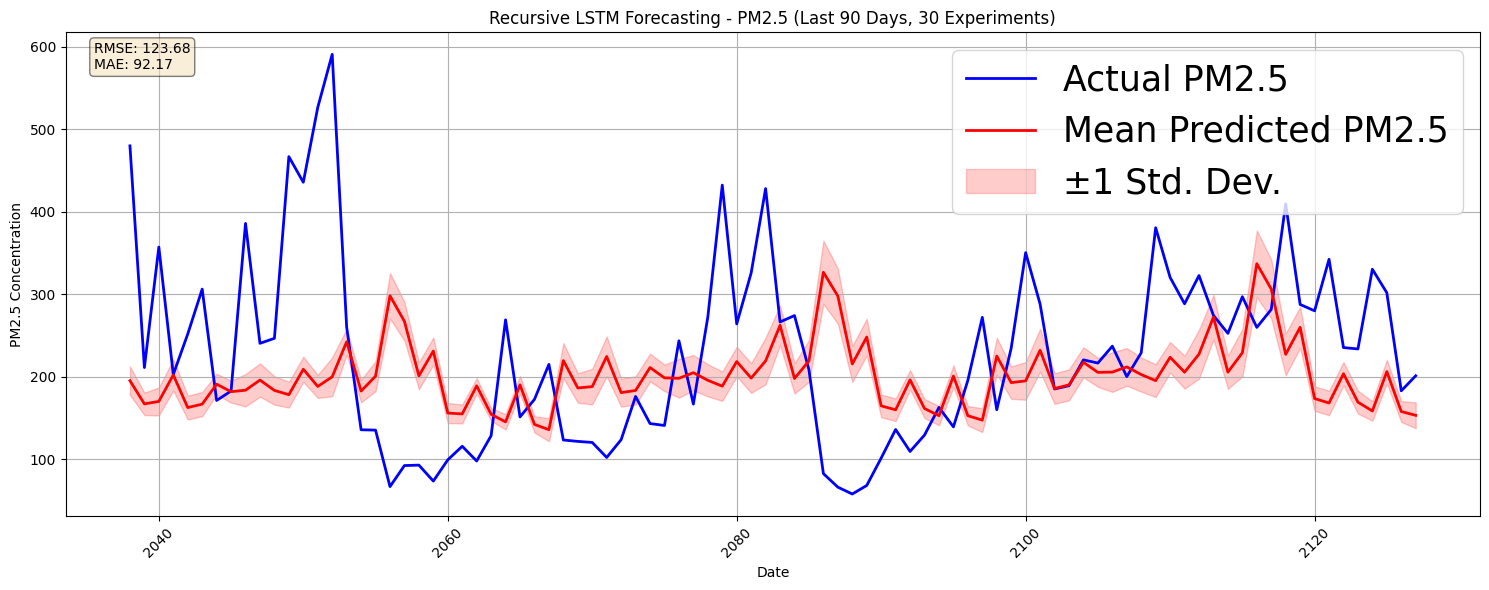

Metrics: RMSE=123.68450760655111, MAE=92.17124938964844


In [ ]:
# Plotting One-month Ahead curve
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Load data from text file
def plot_from_file(filename='/content/sample_data/lstm_forecast_results_AV.txt'):
    # Read the data
    data = pd.read_csv(filename, skipfooter=4, engine='python')  # Skip the metrics section

    # Read the metrics
    with open(filename, 'r') as f:
        lines = f.readlines()
        metrics = {}
        for line in lines[-4:]:  # Last 4 lines contain metrics
            if line.startswith('RMSE') or line.startswith('MAE') or line.startswith('Number_of_Experiments'):
                key, value = line.strip().split(',')
                try:
                    metrics[key] = float(value) if key != 'Number_of_Experiments' else int(value)
                except:
                    metrics[key] = value

    # Convert date strings to datetime objects for better plotting
    # Handle both string and integer date formats
    dates = []
    for d in data['Date']:
        if isinstance(d, str):
            dates.append(datetime.strptime(d, '%Y-%m-%d'))
        else:
            # If it's an integer (like 20200101), convert to string first
            date_str = str(int(d))
            if len(date_str) == 8:  # YYYYMMDD format
                dates.append(datetime.strptime(date_str, '%Y%m%d'))
            else:
                dates.append(d)  # Fallback: use as is

    # Create plot
    plt.figure(figsize=(15, 6))
    plt.plot(dates, data['Actual_PM25'], label='Actual PM2.5', color='blue', linewidth=2)
    plt.plot(dates, data['Mean_Predicted_PM25'], label='Mean Predicted PM2.5', color='red', linestyle='-', linewidth=2)
    plt.fill_between(dates,
                     data['Mean_Predicted_PM25'] - data['Std_Dev_PM25'],
                     data['Mean_Predicted_PM25'] + data['Std_Dev_PM25'],
                     color='red', alpha=0.2, label='±1 Std. Dev.')

    plt.title(f"Recursive LSTM Forecasting - PM2.5 (Last 90 Days, {metrics.get('Number_of_Experiments', 'N/A')} Experiments)")
    plt.xlabel("Date")
    plt.ylabel("PM2.5 Concentration")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    # Add metrics to plot if available
    if 'RMSE' in metrics and 'MAE' in metrics:
        textstr = f"RMSE: {metrics['RMSE']:.2f}\nMAE: {metrics['MAE']:.2f}"
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', bbox=props)

    plt.tight_layout()
    plt.show()

    return data, metrics

# Alternative simpler version if dates are still problematic
def plot_from_file_simple(filename='lstm_forecast_results.txt'):
    # Read the data
    data = pd.read_csv(filename, skipfooter=4, engine='python')  # Skip the metrics section

    # Read the metrics
    with open(filename, 'r') as f:
        lines = f.readlines()
        metrics = {}
        for line in lines[-4:]:  # Last 4 lines contain metrics
            if line.startswith('RMSE') or line.startswith('MAE') or line.startswith('Number_of_Experiments'):
                key, value = line.strip().split(',')
                try:
                    metrics[key] = float(value) if key != 'Number_of_Experiments' else int(value)
                except:
                    metrics[key] = value

    # Use index as x-axis if dates are problematic
    x_values = range(len(data))

    # Create plot
    plt.figure(figsize=(15, 6))
    plt.plot(x_values, data['Actual_PM25'], label='Actual PM2.5', color='blue', linewidth=2)
    plt.plot(x_values, data['Mean_Predicted_PM25'], label='Mean Predicted PM2.5', color='red', linestyle='-', linewidth=2)
    plt.fill_between(x_values,
                     data['Mean_Predicted_PM25'] - data['Std_Dev_PM25'],
                     data['Mean_Predicted_PM25'] + data['Std_Dev_PM25'],
                     color='red', alpha=0.2, label='±1 Std. Dev.')

    plt.title(f"Recursive LSTM Forecasting - PM2.5 (Last 90 Days, {metrics.get('Number_of_Experiments', 'N/A')} Experiments)")
    plt.xlabel("Time Step")
    plt.ylabel("PM2.5 Concentration")
    plt.grid(True)
    plt.legend()

    # Add metrics to plot if available
    if 'RMSE' in metrics and 'MAE' in metrics:
        textstr = f"RMSE: {metrics['RMSE']:.2f}\nMAE: {metrics['MAE']:.2f}"
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', bbox=props)

    plt.tight_layout()
    plt.show()

    return data, metrics

# Usage - try the simple version first
try:
    data, metrics = plot_from_file('/content/sample_data/lstm_forecast_results_AV.txt')
    print(f"Metrics: RMSE={metrics.get('RMSE', 'N/A')}, MAE={metrics.get('MAE', 'N/A')}")
except Exception as e:
    print(f"Error with detailed date parsing: {e}")
    print("Trying simple version...")
    data, metrics = plot_from_file_simple('/content/sample_data/lstm_forecast_results_AV.txt')
    print(f"Metrics: RMSE={metrics.get('RMSE', 'N/A')}, MAE={metrics.get('MAE', 'N/A')}")